# Census-Income (KDD) Data Set 

## Data Set Information

This data set contains weighted census data extracted from the 1994 and 1995 Current Population Surveys conducted by the U.S. Census Bureau. The data contains 41 demographic and employment related variables.   
  
One instance per line with comma delimited fields. There are 199523 instances in the data file and 99762 in the test file.   
  
The data was split into train/test in approximately 2/3, 1/3 proportions using MineSet's MIndUtil mineset-to-mlc.  

Source: https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29

  

## Attribute Information

More information detailing the meaning of the attributes can be found in the Census Bureau's documentation To make use of the data descriptions at this site, the following mappings to the Census Bureau's internal database column names will be needed:   
  
age	'Age'    
class of worker 'ClassOfWorker'   
industry code	'IndustryCode'    
occupation code	'OccupationCode'  
education	'Education'     
wage per hour	'WagePerHour'   
enrolled in edu inst last wk	'EnrolledEducation'     
marital status	'MaritalStatus'       
major industry code	'MajorIndustryCode'    
major occupation code	'MajorOccupationCode'        
Race	'Race'    
hispanic Origin	'HispanicOrigin'    
sex	'Sex'    
member of a labor union	'LabourUnion'     
reason for unemployment	'ReasonUnemployed'           
full or part time employment stat	'FullOrPartTime'       
capital gains	'CapitalGains'    
capital losses	'CapitalLosses'    
divdends from stocks  'StockDividends' 
federal income tax liability	     
tax filer status	'TaxFilerStat'     
region of previous residence	'PrevResidenceRegion'     
state of previous residence	'PrevResidenceState'     
detailed household and family stat	'HouseholdFamilyStatus'    
detailed household summary in household	'HouseholdSummary'    
instance weight	'InstanceWeight'   
migration code-change in msa	'MigrationCodeChangeMSA'   
migration code-change in reg	'MigrationCodeChangeReg'   
migration code-move within reg	'MigrationCodeMoveWithinRegion'   
live in this house 1 year ago	'LiveInHouse1Y'   
migration prev res in sunbelt	'MigPrevResidenceSunbelt'   
num persons worked for employer	'NumPersonsWorkedEmployer'   
family members under 18	'FamilyMembersU18'   
country of birth father	'CountryBirthFather'   
country of birth mother	'CountryBirthMother'   
country of birth self	'CountryBirthSelf'   
citizenship	'Citizenship'   
own business or self employed	'OwnBusiness'   
fill inc questionnaire for veteran's admin	'QuestionnaireVeteran'   
veterans benefits	'VeteranBenefits'   
weeks worked in year	'WeeksWorkedInY'   
  
Incomes 'Income'  


Note that Incomes have been binned at the $50K level to present a binary classification problem, much like the original UCI/ADULT database. The goal field of this data, however, was drawn from the "total person income" field rather than the "adjusted gross income" and may, therefore, behave differently than the original ADULT goal field. 


## Problem Statement

The goal of this analysis is to try to find which factors can be used to predict an individual's annual income (higher or lower than 50k USD), and then predict the income level based on these factors.

## Summary

As part of the analysis, I will be going through the following steps:

**1- Data Extraction:**      
Data is available in CSV files that can be downloaded at the source mentioned above.

**2- Data Cleaning**

**3- Exploratory Data Analysis**

**4- Modeling:**     
a) Feature Selection: I will use Random Forest Classification for feature selection      
b) Model Selection: I will use the selected features and apply Decision Trees and Logistic Regression. I will then proceed with the one with better rates.     

**5- Oversampling:**
Given that the data is skewed (only 8% are positive), I will also try oversampling using SMOTE to enhance the recall rates. I will then compare both results (with and without oversampling).

In [437]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the data

In [438]:
#Training and Test data is already split into two CSV's. Hence we will read them separately, and apply all changes to both data sets

columns = ['Age', 'ClassOfWorker', 'IndustryCode', 'OccupationCode','Education', 'WagePerHour', 'EnrolledEducation',
          'MaritalStatus', 'MajorIndustryCode', 'MajorOccupationCode', 'Race', 'HispanicOrigin', 'Sex', 'LabourUnion',
          'ReasonUnemployed', 'FullOrPartTime', 'CapitalGains', 'CapitalLosses', 'StockDividends', 'TaxFilerStat',
          'PrevResidenceRegion', 'PrevResidenceState', 'HouseholdFamilyStatus', 'HouseholdSummary', 'InstanceWeight', 
          'MigrationCodeChangeMSA','MigrationCodeChangeReg', 'MigrationCodeMoveWithinRegion', 'LiveInHouse1Y', 
            'MigPrevResidenceSunbelt', 'NumPersonsWorkedEmployer', 'FamilyMembersU18', 'CountryBirthFather',
          'CountryBirthMother', 'CountryBirthSelf', 'Citizenship', 'OwnBusiness', 'QuestionnaireVeteran',
          'VeteranBenefits','WeeksWorkedInY', 'Year','Income']

df = pd.read_csv('Data/census-income.data', header=None)
df.columns = columns
df.drop(['InstanceWeight'], axis=1, inplace=True)

df_test = pd.read_csv('Data/census-income.test', header=None)
df_test.columns = columns
df_test.drop(['InstanceWeight'], axis=1, inplace=True)

In [439]:
df.shape

(199523, 41)

In [440]:
df_test.shape

(99762, 41)

In [441]:
df.head()

,Age,ClassOfWorker,IndustryCode,OccupationCode,Education,WagePerHour,EnrolledEducation,MaritalStatus,MajorIndustryCode,MajorOccupationCode,...,CountryBirthFather,CountryBirthMother,CountryBirthSelf,Citizenship,OwnBusiness,QuestionnaireVeteran,VeteranBenefits,WeeksWorkedInY,Year,Income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [442]:
#Trim the strings in the data
for i in df.columns:
    if type(df[i][0]) == str:
        df[i] = df[i].apply(lambda x: str(x).strip())
        df_test[i] = df_test[i].apply(lambda x: str(x).strip())

In [443]:
#Drop duplicates
df.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)


# Data Cleaning

In [444]:
#Check missing data
for i in df.columns:
    print(df[i].unique())

[73 58 18  9 10 48 42 28 47 34  8 32 51 46 26 13 39 16 35 12 27 56 55  2  1
 37  4 63 25 81 11 30  7 66 84 52  5 36 72 61 41 90 49  6  0 33 57 50 24 17
 53 40 54 22 29 85 38 76 21 31 74 19 15  3 43 68 71 45 62 23 69 75 44 59 60
 64 65 70 67 78 20 14 83 86 89 77 79 82 80 87 88]
['Not in universe' 'Self-employed-not incorporated' 'Private'
 'Local government' 'Federal government' 'Self-employed-incorporated'
 'State government' 'Never worked' 'Without pay']
[ 0  4 40 34 43 37 24 39 12 35 45  3 19 29 32 48 33 23 44 36 31 30 41  5 11
  9 42  6 18 50  2  1 26 47 16 14 22 17  7  8 25 46 27 15 13 49 38 21 28 20
 51 10]
[ 0 34 10  3 40 26 37 31 12 36 41 22  2 35 25 23 42  8 19 29 27 16 33 13 18
  9 17 39 32 11 30 38 20  7 21 44 24 43 28  4  1  6 45 14  5 15 46]
['High school graduate' 'Some college but no degree' '10th grade'
 'Children' 'Bachelors degree(BA AB BS)'
 'Masters degree(MA MS MEng MEd MSW MBA)' 'Less than 1st grade'
 'Associates degree-academic program' '7th and 8th grade'
 '12th 

In [445]:
#Some missing data is represented as '?', others are 'Not in universe'
df.replace("?", np.nan, inplace=True)
df.replace("Not in universe", np.nan, inplace=True)
df_test.replace("?", np.nan, inplace=True)
df_test.replace("Not in universe", np.nan, inplace=True)

In [446]:
df.isnull().sum()

Age                                   0
ClassOfWorker                     54165
IndustryCode                          0
OccupationCode                        0
Education                             0
WagePerHour                           0
EnrolledEducation                142243
MaritalStatus                         0
MajorIndustryCode                     0
MajorOccupationCode               54548
Race                                  0
HispanicOrigin                        0
Sex                                   0
LabourUnion                      133840
ReasonUnemployed                 146884
FullOrPartTime                        0
CapitalGains                          0
CapitalLosses                         0
StockDividends                        0
TaxFilerStat                          0
PrevResidenceRegion              137492
PrevResidenceState               138190
HouseholdFamilyStatus                 0
HouseholdSummary                      0
MigrationCodeChangeMSA            75288


In [447]:
#Delete the columns with almost completely missing values
df.drop(['EnrolledEducation','LabourUnion', 'ReasonUnemployed', 'PrevResidenceRegion','PrevResidenceState', 
         'MigPrevResidenceSunbelt','QuestionnaireVeteran','FamilyMembersU18','MigrationCodeChangeMSA',
         'MigrationCodeChangeReg','MigrationCodeMoveWithinRegion'], axis=1, inplace=True)

df_test.drop(['EnrolledEducation','LabourUnion', 'ReasonUnemployed', 'PrevResidenceRegion','PrevResidenceState', 
         'MigPrevResidenceSunbelt','QuestionnaireVeteran','FamilyMembersU18','MigrationCodeChangeMSA',
         'MigrationCodeChangeReg','MigrationCodeMoveWithinRegion'], axis=1, inplace=True)

In [448]:
#Drop Rows with few missing column values
df.dropna(subset=['CountryBirthFather','CountryBirthMother','CountryBirthSelf'], inplace=True)
df_test.dropna(subset=['CountryBirthFather','CountryBirthMother','CountryBirthSelf'], inplace=True)

In [449]:
df.isnull().sum()

Age                             0
ClassOfWorker               49901
IndustryCode                    0
OccupationCode                  0
Education                       0
WagePerHour                     0
MaritalStatus                   0
MajorIndustryCode               0
MajorOccupationCode         50258
Race                            0
HispanicOrigin                  0
Sex                             0
FullOrPartTime                  0
CapitalGains                    0
CapitalLosses                   0
StockDividends                  0
TaxFilerStat                    0
HouseholdFamilyStatus           0
HouseholdSummary                0
LiveInHouse1Y                   0
NumPersonsWorkedEmployer        0
CountryBirthFather              0
CountryBirthMother              0
CountryBirthSelf                0
Citizenship                     0
OwnBusiness                     0
VeteranBenefits                 0
WeeksWorkedInY                  0
Year                            0
Income        

In [450]:
#ClassOfWorker and MajorOccupationCode are missing for those who do not work. I will replace them with 'NA'
df[['ClassOfWorker','MajorOccupationCode']] = df[['ClassOfWorker','MajorOccupationCode']].fillna('NA')
df_test[['ClassOfWorker','MajorOccupationCode']] = df_test[['ClassOfWorker','MajorOccupationCode']].fillna('NA')

In [451]:
df['Income>50k'] = np.where(df['Income'] == '- 50000.', 0, 1)
df.drop('Income', axis=1, inplace=True)

df_test['Income>50k'] = np.where(df_test['Income'] == '- 50000.', 0, 1)
df_test.drop('Income', axis=1, inplace=True)

In [452]:
df.head(100)

,Age,ClassOfWorker,IndustryCode,OccupationCode,Education,WagePerHour,MaritalStatus,MajorIndustryCode,MajorOccupationCode,Race,...,NumPersonsWorkedEmployer,CountryBirthFather,CountryBirthMother,CountryBirthSelf,Citizenship,OwnBusiness,VeteranBenefits,WeeksWorkedInY,Year,Income>50k
0,73,NA,0,0,High school graduate,0,Widowed,Not in universe or children,NA,White,...,0,United-States,United-States,United-States,Native- Born in the United States,0,2,0,95,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Divorced,Construction,Precision production craft & repair,White,...,1,United-States,United-States,United-States,Native- Born in the United States,0,2,52,94,0
2,18,NA,0,0,10th grade,0,Never married,Not in universe or children,NA,Asian or Pacific Islander,...,0,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,2,0,95,0
3,9,NA,0,0,Children,0,Never married,Not in universe or children,NA,White,...,0,United-States,United-States,United-States,Native- Born in the United States,0,0,0,94,0
4,10,NA,0,0,Children,0,Never married,Not in universe or children,NA,White,...,0,United-States,United-States,United-States,Native- Born in the United States,0,0,0,94,0
5,48,Private,40,10,Some college but no degree,1200,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,...,1,Philippines,United-States,United-States,Native- Born in the United States,2,2,52,95,0
6,42,Private,34,3,Bachelors degree(BA AB BS),0,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,...,6,United-States,United-States,United-States,Native- Born in the United States,0,2,52,94,0
7,28,Private,4,40,High school graduate,0,Never married,Construction,Handlers equip cleaners etc,White,...,4,United-States,United-States,United-States,Native- Born in the United States,0,2,30,95,0
8,47,Local government,43,26,Some college but no degree,876,Married-civilian spouse present,Education,Adm support including clerical,White,...,5,United-States,United-States,United-States,Native- Born in the United States,0,2,52,95,0
9,34,Private,4,37,Some college but no degree,0,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,White,...,6,United-States,United-States,United-States,Native- Born in the United States,0,2,52,94,0


In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145005 entries, 0 to 199520
Data columns (total 30 columns):
Age                         145005 non-null int64
ClassOfWorker               145005 non-null object
IndustryCode                145005 non-null int64
OccupationCode              145005 non-null int64
Education                   145005 non-null object
WagePerHour                 145005 non-null int64
MaritalStatus               145005 non-null object
MajorIndustryCode           145005 non-null object
MajorOccupationCode         145005 non-null object
Race                        145005 non-null object
HispanicOrigin              145005 non-null object
Sex                         145005 non-null object
FullOrPartTime              145005 non-null object
CapitalGains                145005 non-null int64
CapitalLosses               145005 non-null int64
StockDividends              145005 non-null int64
TaxFilerStat                145005 non-null object
HouseholdFamilyStatus       1

In [454]:
df.describe()

,Age,IndustryCode,OccupationCode,WagePerHour,CapitalGains,CapitalLosses,StockDividends,NumPersonsWorkedEmployer,OwnBusiness,VeteranBenefits,WeeksWorkedInY,Year,Income>50k
count,145005.000000,145005.000000,145005.000000,145005.000000,145005.000000,145005.000000,145005.000000,145005.000000,145005.000000,145005.000000,145005.000000,145005.000000,145005.000000
mean,39.418468,20.221965,14.959374,73.836302,557.842136,48.684659,252.061688,2.581587,0.234282,1.826165,30.532313,94.488976,0.080577
std,19.327772,18.201672,14.910480,313.499755,5286.552736,308.852831,2260.621084,2.402695,0.629074,0.551837,23.667317,0.499880,0.272185
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000,0.000000
50%,38.000000,24.000000,12.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,47.000000,94.000000,0.000000
75%,52.000000,37.000000,29.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,2.000000,52.000000,95.000000,0.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.000000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000,1.000000


Looks like there are some wrong values, such as WagePerHour (9999). I will look into those during EDA

# Exploratory Data Analysis

In [455]:
df['Income>50k'].value_counts()

0    133321
1     11684
Name: Income>50k, dtype: int64

In [456]:
df['Income>50k'].value_counts(normalize=True)

0    0.919423
1    0.080577
Name: Income>50k, dtype: float64

<b>Age

In [457]:
df['Age'].describe()

count    145005.000000
mean         39.418468
std          19.327772
min           0.000000
25%          25.000000
50%          38.000000
75%          52.000000
max          90.000000
Name: Age, dtype: float64

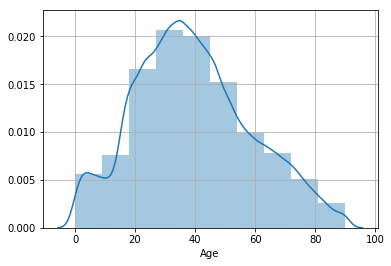

In [458]:
sns.distplot(df['Age'], bins=10)
plt.grid()

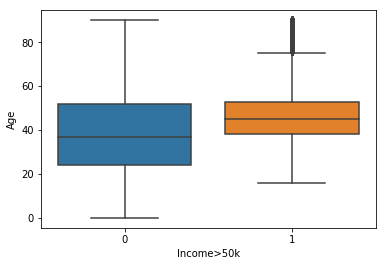

In [459]:
sns.boxplot(x='Income>50k', y='Age',data=df)

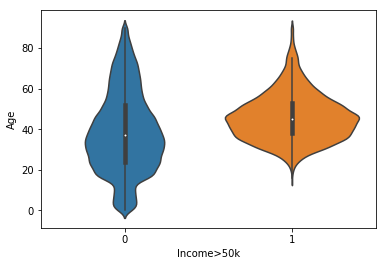

In [460]:
sns.violinplot(x='Income>50k', y='Age',data=df)

<Figure size 720x720 with 0 Axes>

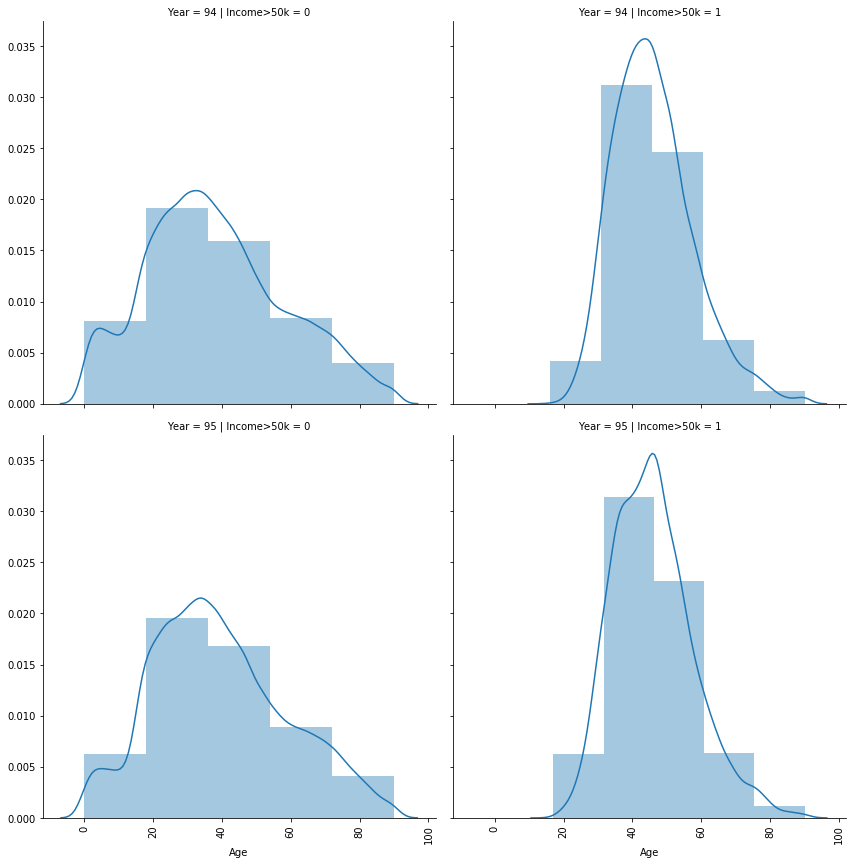

In [461]:
plt.figure(figsize=(10,10))
g = sns.FacetGrid(data=df, col='Income>50k', row='Year', height=6)
g.map(sns.distplot, 'Age', bins=5)
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=90) # set new labels

<b>ClassOfWorker

In [462]:
df['ClassOfWorker'].describe()

count      145005
unique          9
top       Private
freq        69208
Name: ClassOfWorker, dtype: object

In [463]:
df['ClassOfWorker'].value_counts()

Private                           69208
NA                                49901
Self-employed-not incorporated     7935
Local government                   7512
State government                   4090
Self-employed-incorporated         3033
Federal government                 2813
Never worked                        357
Without pay                         156
Name: ClassOfWorker, dtype: int64

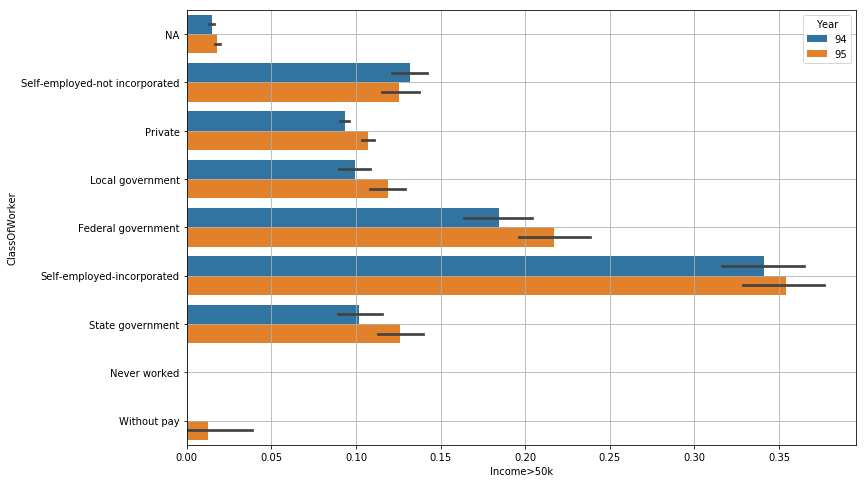

In [464]:
plt.figure(figsize=(12,8))
sns.barplot(y='ClassOfWorker', x='Income>50k', data=df, orient="h", hue='Year', dodge=True)
plt.grid(True)

In [465]:
#Rename Never Worked and Without Pay to NA
#Join State and Local Govt
df['ClassOfWorker'] = np.where(df['ClassOfWorker'] == 'Never worked', 'NA', df['ClassOfWorker'])
df['ClassOfWorker'] = np.where(df['ClassOfWorker'] == 'Without pay', 'NA', df['ClassOfWorker'])
df['ClassOfWorker'] = np.where(df['ClassOfWorker'] == 'Local government', 'Non Federal Government', df['ClassOfWorker'])
df['ClassOfWorker'] = np.where(df['ClassOfWorker'] == 'State government', 'Non Federal Government', df['ClassOfWorker'])

df_test['ClassOfWorker'] = np.where(df_test['ClassOfWorker'] == 'Never worked', 'NA', df_test['ClassOfWorker'])
df_test['ClassOfWorker'] = np.where(df_test['ClassOfWorker'] == 'Without pay', 'NA', df_test['ClassOfWorker'])
df_test['ClassOfWorker'] = np.where(df_test['ClassOfWorker'] == 'Local government', 'Non Federal Government', df_test['ClassOfWorker'])
df_test['ClassOfWorker'] = np.where(df_test['ClassOfWorker'] == 'State government', 'Non Federal Government', df_test['ClassOfWorker'])

df['ClassOfWorker'].value_counts()

Private                           69208
NA                                50414
Non Federal Government            11602
Self-employed-not incorporated     7935
Self-employed-incorporated         3033
Federal government                 2813
Name: ClassOfWorker, dtype: int64

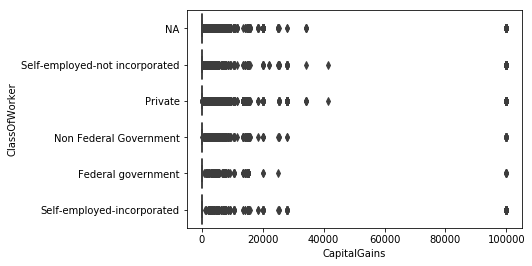

In [466]:
sns.boxplot(y='ClassOfWorker', x='CapitalGains', data=df, orient='h')

<b> Industry Code - Major Industry Code

In [467]:
df['IndustryCode'].unique()

array([ 0,  4, 40, 34, 43, 37, 24, 39, 12, 35, 45,  3, 19, 29, 32, 48, 33,
       23, 44, 36, 31, 30, 41,  5, 11,  9, 42,  6, 18, 50,  2,  1, 26, 47,
       16, 14, 22, 17,  7,  8, 25, 46, 27, 15, 13, 49, 38, 21, 28, 51, 20,
       10], dtype=int64)

In [468]:
df['IndustryCode'].value_counts()

0     50258
33    16241
43     7922
4      5771
42     4493
45     4226
29     4041
37     3817
41     3808
32     3458
35     3254
39     2797
34     2629
44     2457
2      2072
11     1695
50     1656
47     1609
40     1589
38     1544
24     1444
19     1319
12     1302
31     1143
30     1141
25     1023
9       967
22      917
36      892
13      874
1       808
48      626
27      609
49      587
3       557
5       548
21      540
6       539
8       535
16      516
23      516
18      461
15      437
7       412
14      289
46      183
17      153
28      138
26      124
51       33
20       31
10        4
Name: IndustryCode, dtype: int64

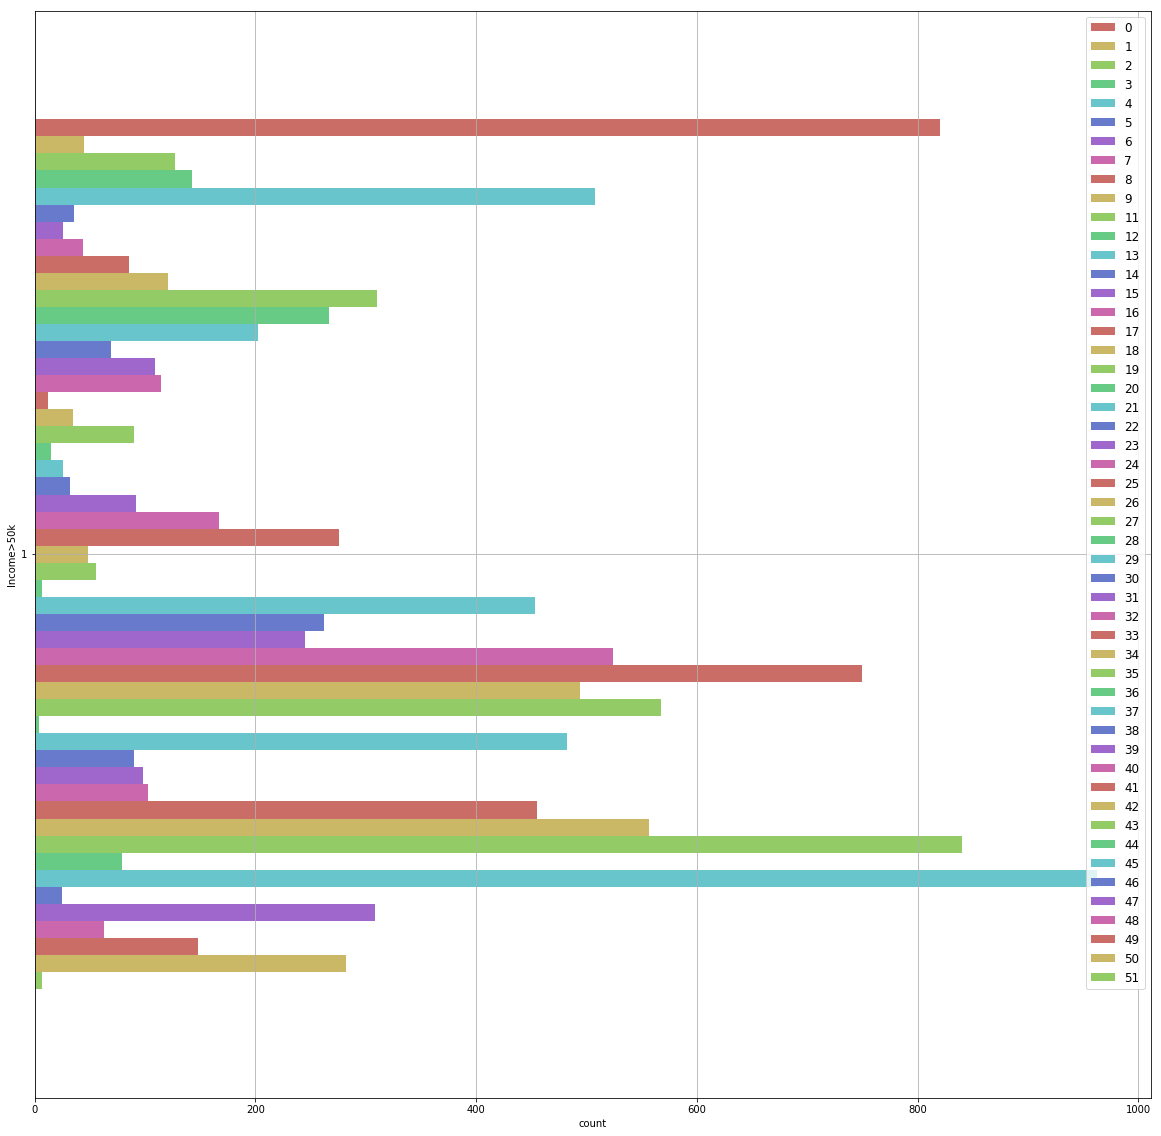

In [469]:
plt.figure(figsize=(20,20))
sns.countplot(y='Income>50k', hue='IndustryCode', data=df[df['Income>50k']==1], palette=sns.color_palette("hls", 8))
plt.grid()
plt.legend(fontsize='large')

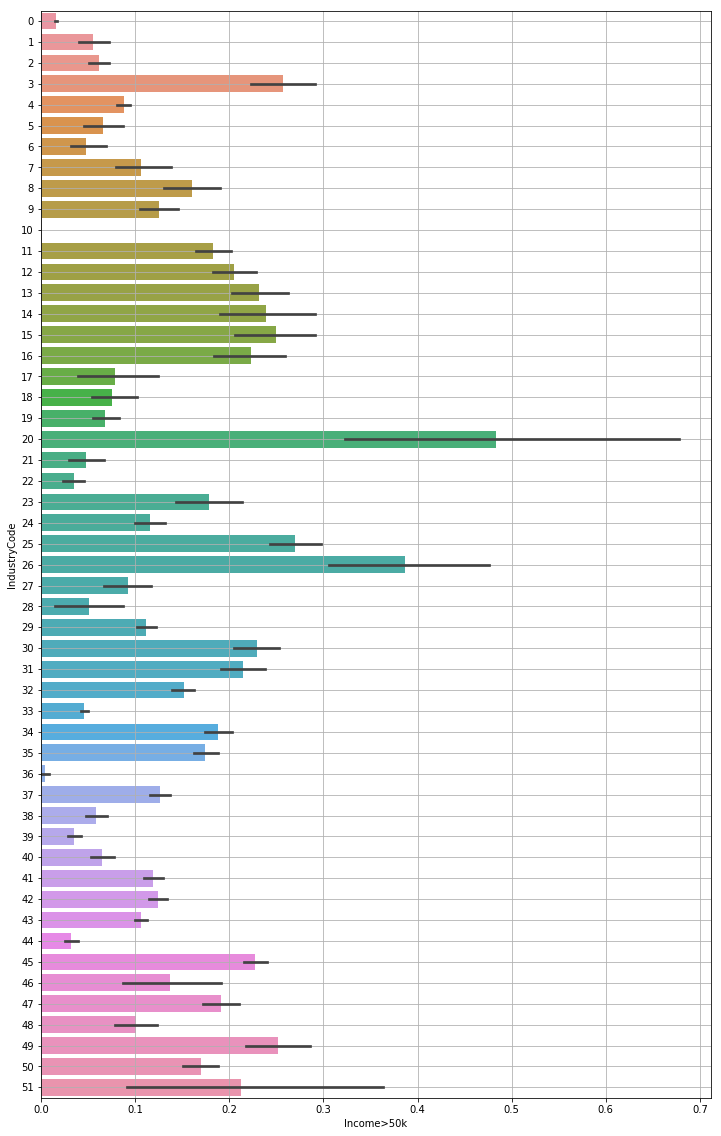

In [470]:
plt.figure(figsize=(12,20))
sns.barplot(y='IndustryCode', x='Income>50k', data=df, orient="h", dodge=True)
plt.grid(True)

In [471]:
df['MajorIndustryCode'].value_counts()

Not in universe or children            50258
Retail trade                           16241
Manufacturing-durable goods             8732
Education                               7922
Manufacturing-nondurable goods          6661
Finance insurance and real estate       5883
Construction                            5771
Business and repair services            5361
Medical except hospital                 4493
Public administration                   4478
Other professional services             4226
Transportation                          4041
Hospital services                       3808
Wholesale trade                         3458
Agriculture                             2880
Personal services except private HH     2797
Social services                         2457
Entertainment                           1589
Utilities and sanitary services         1143
Communications                          1141
Private household services               892
Mining                                   557
Forestry a

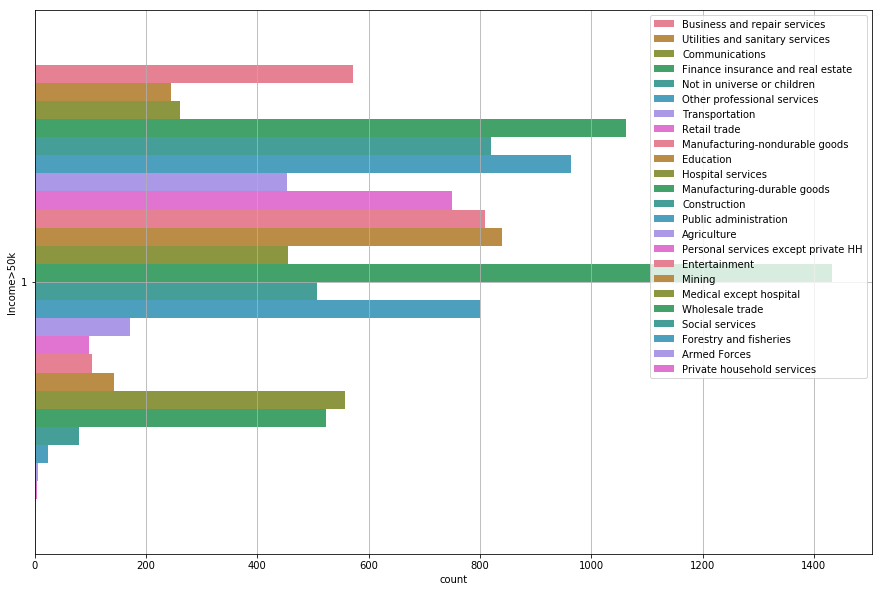

In [472]:
plt.figure(figsize=(15,10))
sns.countplot(y='Income>50k', hue='MajorIndustryCode', data=df[df['Income>50k']==1],palette=sns.color_palette("husl", 8))
plt.grid()
plt.legend(fontsize='medium')

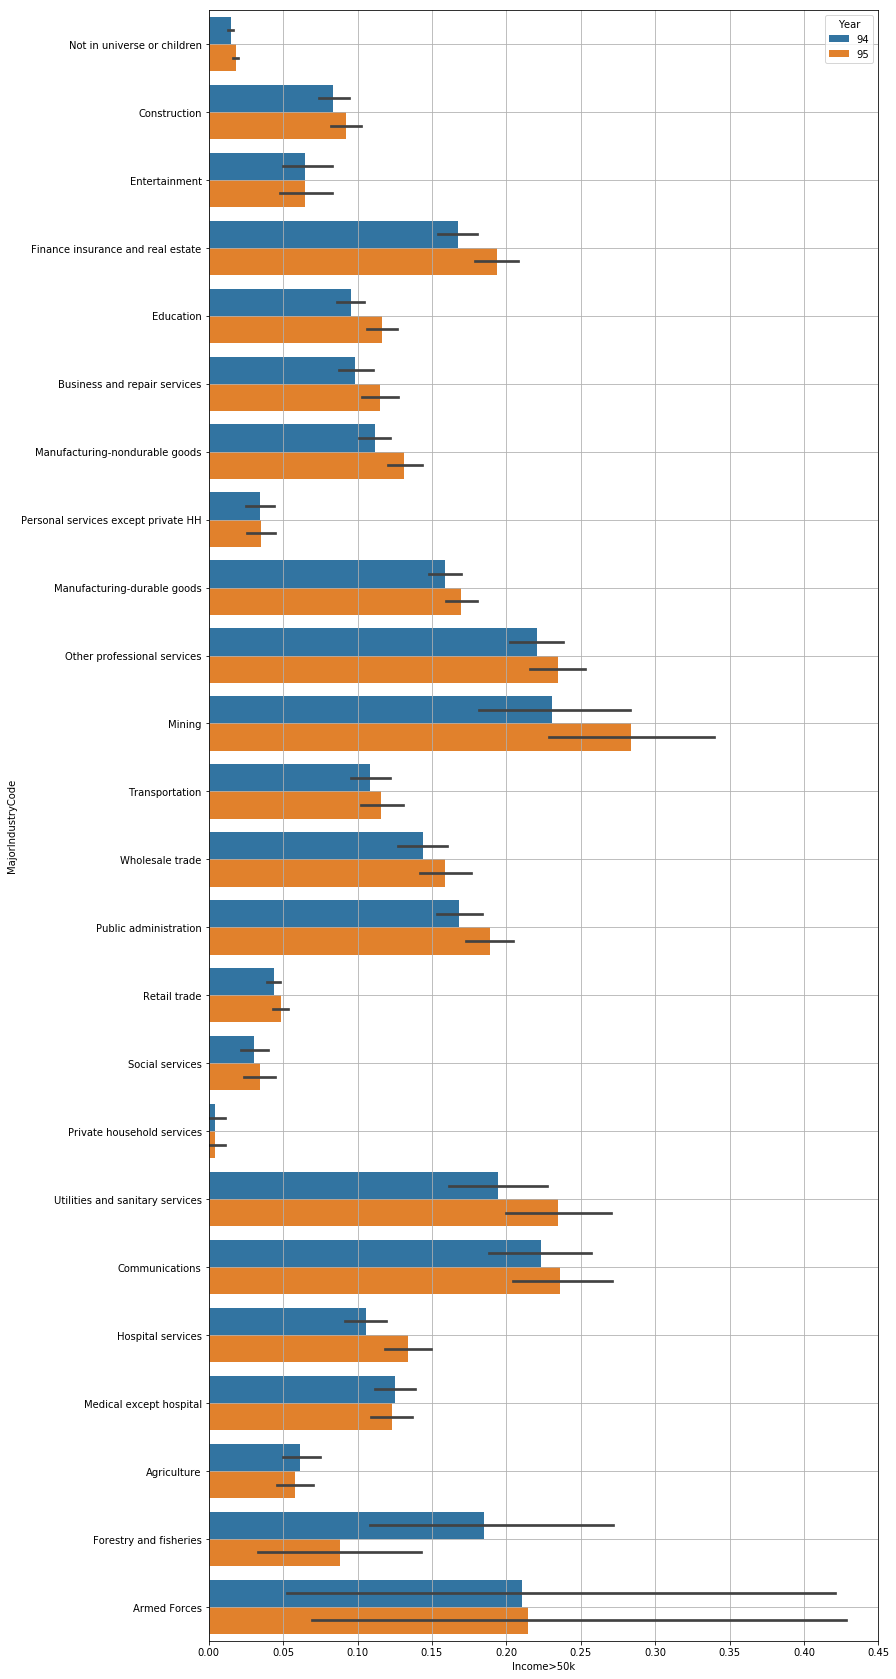

In [473]:
plt.figure(figsize=(12,30))
sns.barplot(y='MajorIndustryCode', x='Income>50k', data=df, orient="h", hue='Year')
plt.grid(True)

In [474]:
df.groupby('MajorIndustryCode')['IndustryCode'].unique()

MajorIndustryCode
Agriculture                                                                       [2, 1]
Armed Forces                                                                        [51]
Business and repair services                                                    [37, 38]
Communications                                                                      [30]
Construction                                                                         [4]
Education                                                                           [43]
Entertainment                                                                       [40]
Finance insurance and real estate                                               [34, 35]
Forestry and fisheries                                                              [46]
Hospital services                                                                   [41]
Manufacturing-durable goods            [12, 5, 11, 9, 6, 18, 16, 14, 17, 7, 8, 15, 13...
Man

In [475]:
df.groupby(['IndustryCode','MajorIndustryCode'])['Income>50k'].sum().sort_values()


IndustryCode  MajorIndustryCode                  
10            Manufacturing-durable goods              0
36            Private household services               4
28            Manufacturing-nondurable goods           7
51            Armed Forces                             7
17            Manufacturing-durable goods             12
20            Manufacturing-nondurable goods          15
46            Forestry and fisheries                  25
6             Manufacturing-durable goods             26
21            Manufacturing-nondurable goods          26
22            Manufacturing-nondurable goods          32
18            Manufacturing-durable goods             35
5             Manufacturing-durable goods             36
7             Manufacturing-durable goods             44
1             Agriculture                             45
26            Manufacturing-nondurable goods          48
27            Manufacturing-nondurable goods          56
48            Public administration   

In [476]:
#Industry Code is too scattered, and the values are too small for each Code. I will drop it and use Major Industry Code only
df.drop('IndustryCode', axis=1, inplace=True)
df_test.drop('IndustryCode', axis=1, inplace=True)

<b> OccupationCode and MajorOccupationCode

In [477]:
df['OccupationCode'].describe()

count    145005.000000
mean         14.959374
std          14.910480
min           0.000000
25%           0.000000
50%          12.000000
75%          29.000000
max          46.000000
Name: OccupationCode, dtype: float64

In [478]:
df['OccupationCode'].value_counts()

0     50258
2      8368
26     7613
19     5130
29     4904
36     4011
34     3855
10     3531
23     3283
16     3272
33     3200
12     3171
35     3064
3      3044
38     2894
31     2601
32     2295
37     2169
8      2063
42     1873
30     1811
24     1784
17     1700
28     1608
44     1553
41     1525
43     1273
4      1269
13     1230
18     1035
39     1001
14      909
5       806
15      777
25      745
27      733
9       681
7       663
40      604
11      591
1       519
21      518
6       404
22      397
45      169
20       68
46       33
Name: OccupationCode, dtype: int64

In [479]:
df['MajorOccupationCode'].unique()

array(['NA', 'Precision production craft & repair',
       'Professional specialty', 'Executive admin and managerial',
       'Handlers equip cleaners etc', 'Adm support including clerical',
       'Machine operators assmblrs & inspctrs', 'Other service', 'Sales',
       'Private household services', 'Technicians and related support',
       'Transportation and material moving',
       'Farming forestry and fishing', 'Protective services',
       'Armed Forces'], dtype=object)

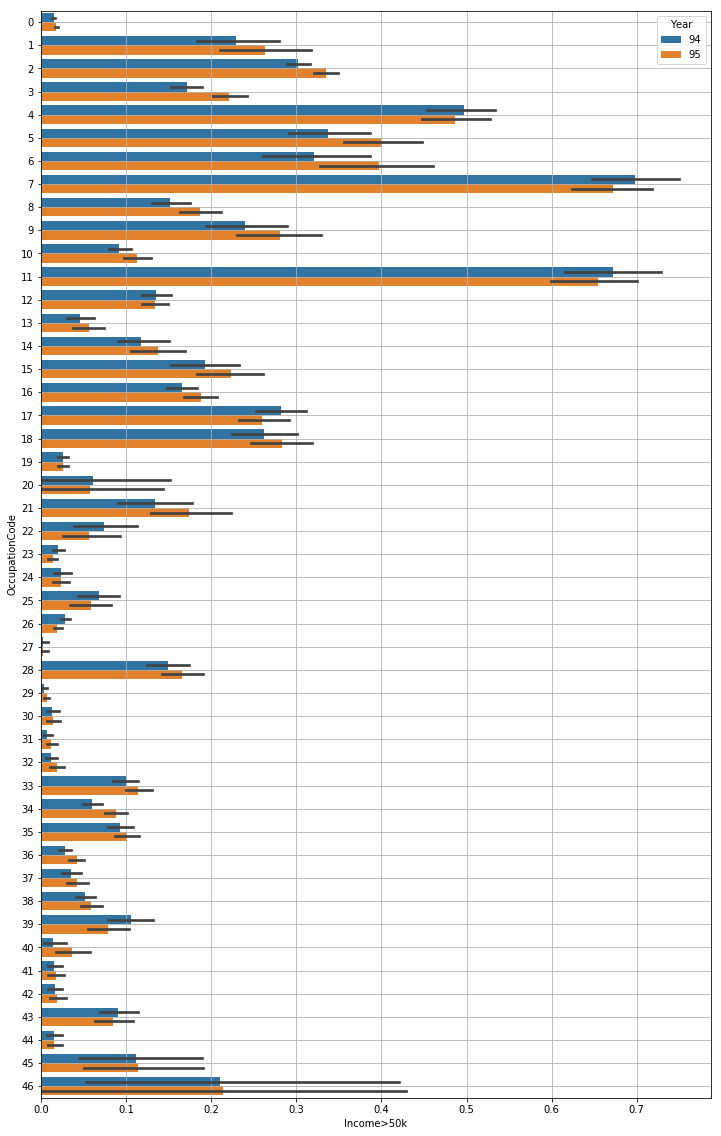

In [480]:
plt.figure(figsize=(12,20))
sns.barplot(y='OccupationCode', x='Income>50k', data=df, orient="h", hue='Year', dodge=True)
plt.grid(True)

In [481]:
df.groupby('MajorOccupationCode')['OccupationCode'].unique()

MajorOccupationCode
Adm support including clerical                 [26, 22, 25, 23, 21, 24]
Armed Forces                                                       [46]
Executive admin and managerial                                [3, 2, 1]
Farming forestry and fishing                               [44, 43, 45]
Handlers equip cleaners etc                                [40, 41, 42]
Machine operators assmblrs & inspctrs                          [37, 36]
NA                                                                  [0]
Other service                                          [31, 29, 32, 30]
Precision production craft & repair                        [34, 35, 33]
Private household services                                         [27]
Professional specialty                   [10, 12, 8, 9, 11, 7, 4, 6, 5]
Protective services                                                [28]
Sales                                              [19, 16, 18, 17, 20]
Technicians and related support             

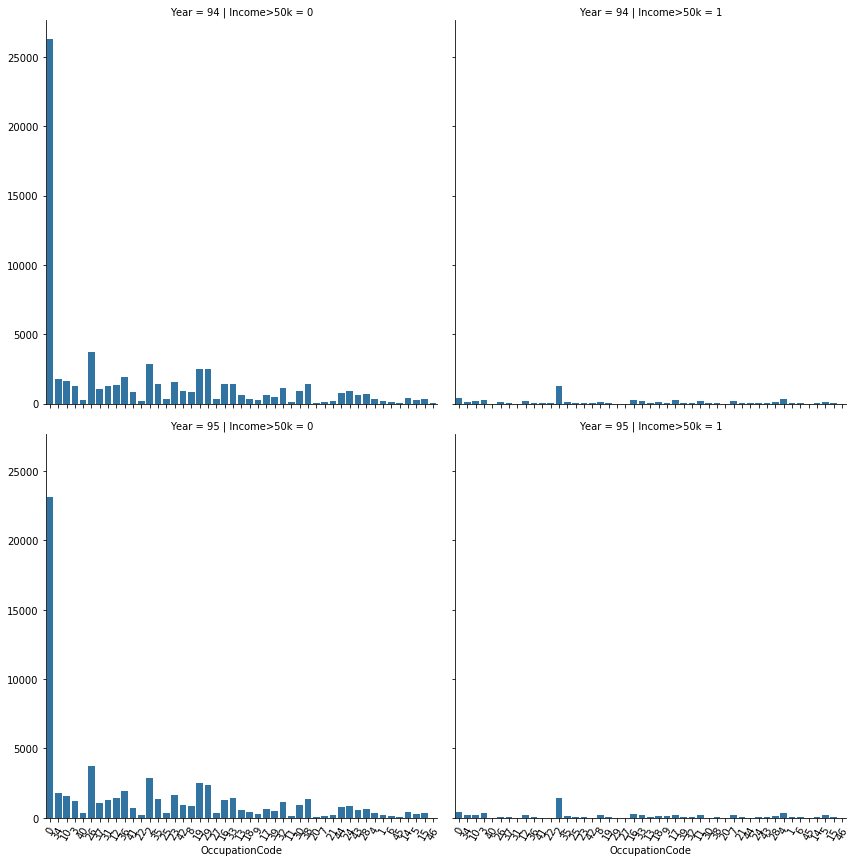

In [482]:
g = sns.FacetGrid(data=df, col='Income>50k', row='Year', height=6)
g.map(sns.countplot, 'OccupationCode', order=df['OccupationCode'].unique())
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=60) # set new labels

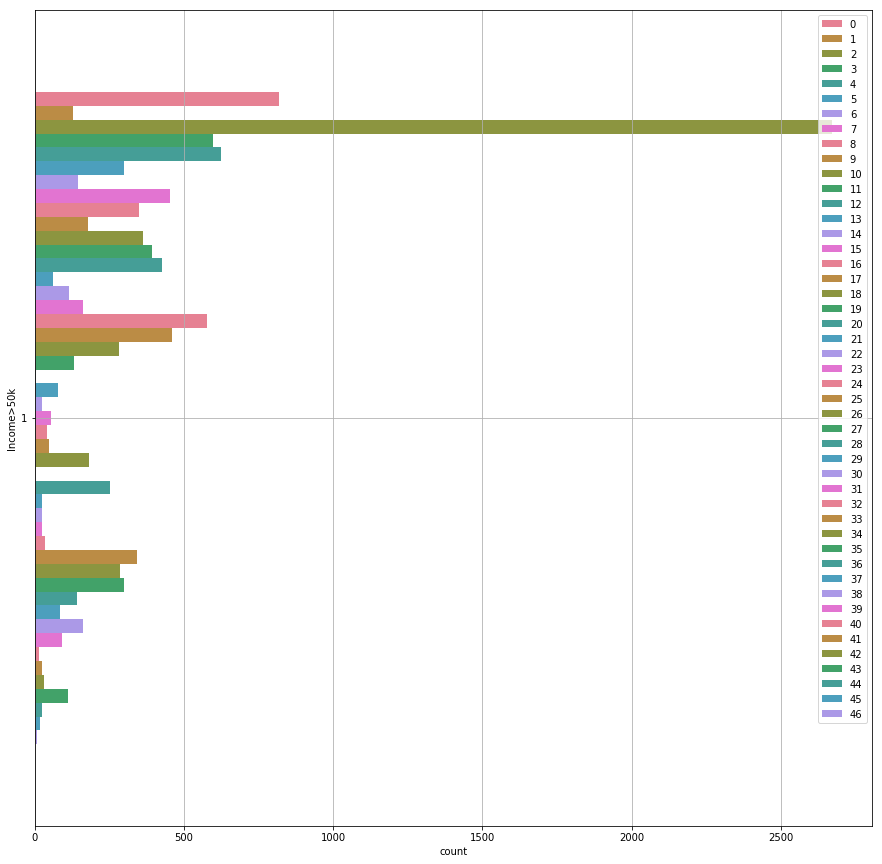

In [483]:
plt.figure(figsize=(15,15))
sns.countplot(y='Income>50k', hue='OccupationCode', data=df[df['Income>50k']==1],palette=sns.color_palette("husl", 8))
plt.grid()
plt.legend(fontsize='medium')

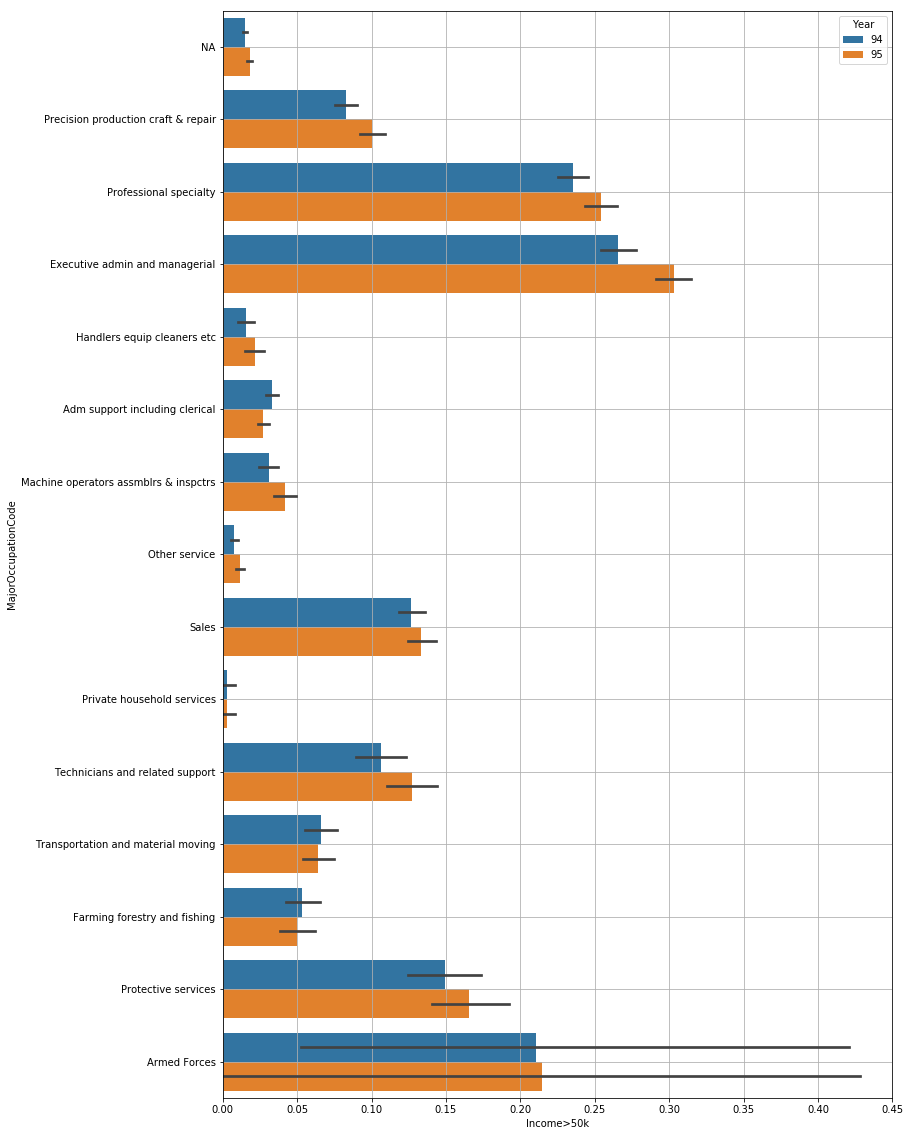

In [484]:
plt.figure(figsize=(12,20))
sns.barplot(y='MajorOccupationCode', x='Income>50k', data=df, orient="h", hue='Year', dodge=True)
plt.grid(True)

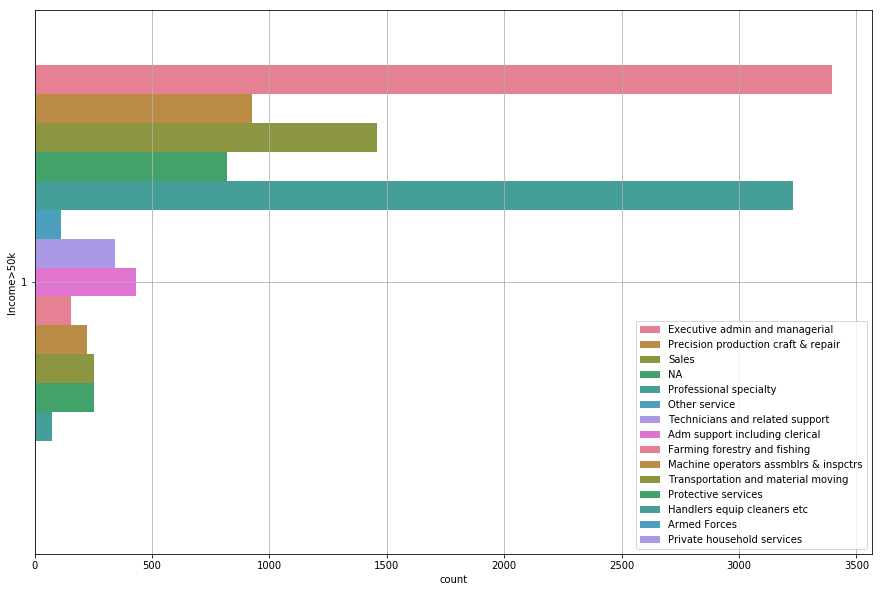

In [485]:
plt.figure(figsize=(15,10))
sns.countplot(y='Income>50k', hue='MajorOccupationCode', data=df[df['Income>50k']==1],palette=sns.color_palette("husl", 8))
plt.grid()
plt.legend(fontsize='medium')

In [486]:
#Occupation Code is too scattered, and the values are too small for each Code. I will drop it and use Major Occupation Code only
df.drop('OccupationCode', axis=1, inplace=True)
df_test.drop('OccupationCode', axis=1, inplace=True)

<b>Education

In [487]:
df['Education'].value_counts()

High school graduate                      41733
Some college but no degree                25146
Bachelors degree(BA AB BS)                18278
Children                                  11679
10th grade                                 6199
Masters degree(MA MS MEng MEd MSW MBA)     6059
11th grade                                 6003
7th and 8th grade                          5852
Associates degree-occup /vocational        5034
9th grade                                  4787
Associates degree-academic program         4125
5th or 6th grade                           2999
12th grade no diploma                      1949
1st 2nd 3rd or 4th grade                   1683
Prof school degree (MD DDS DVM LLB JD)     1598
Doctorate degree(PhD EdD)                  1120
Less than 1st grade                         761
Name: Education, dtype: int64

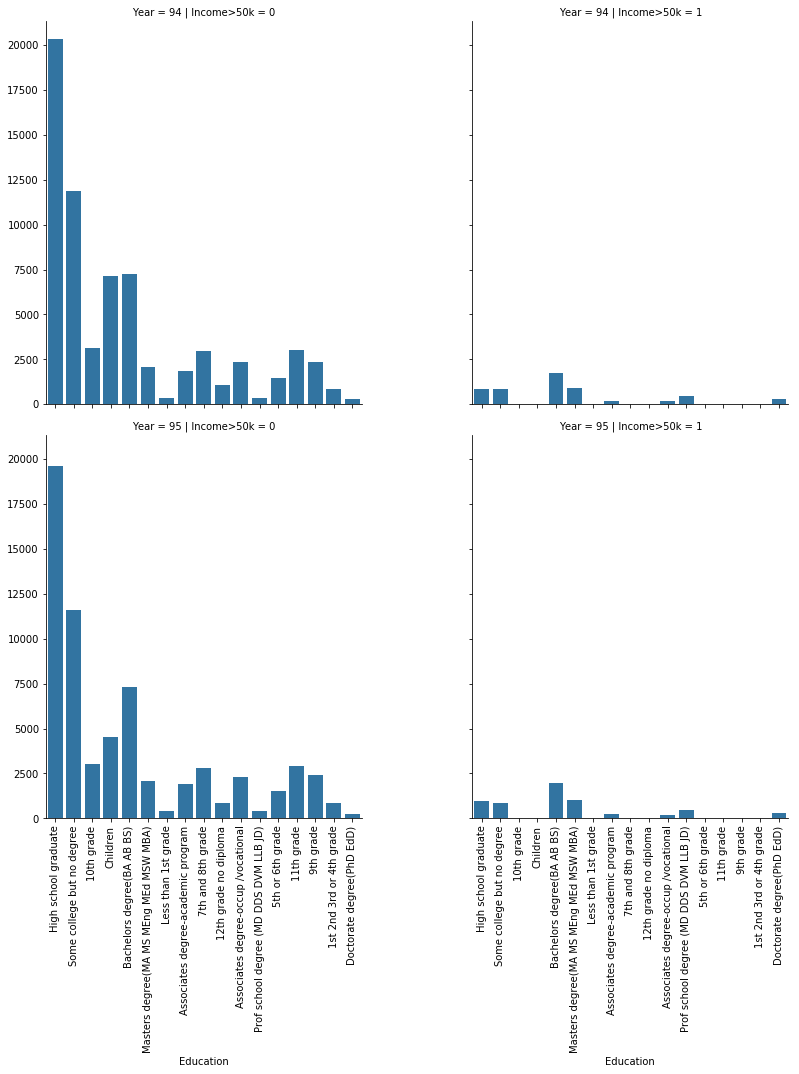

In [488]:
g = sns.FacetGrid(data=df, col='Income>50k', row='Year', height=6)
g.map(sns.countplot, 'Education', order=df['Education'].unique() )
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=90) # set new labels

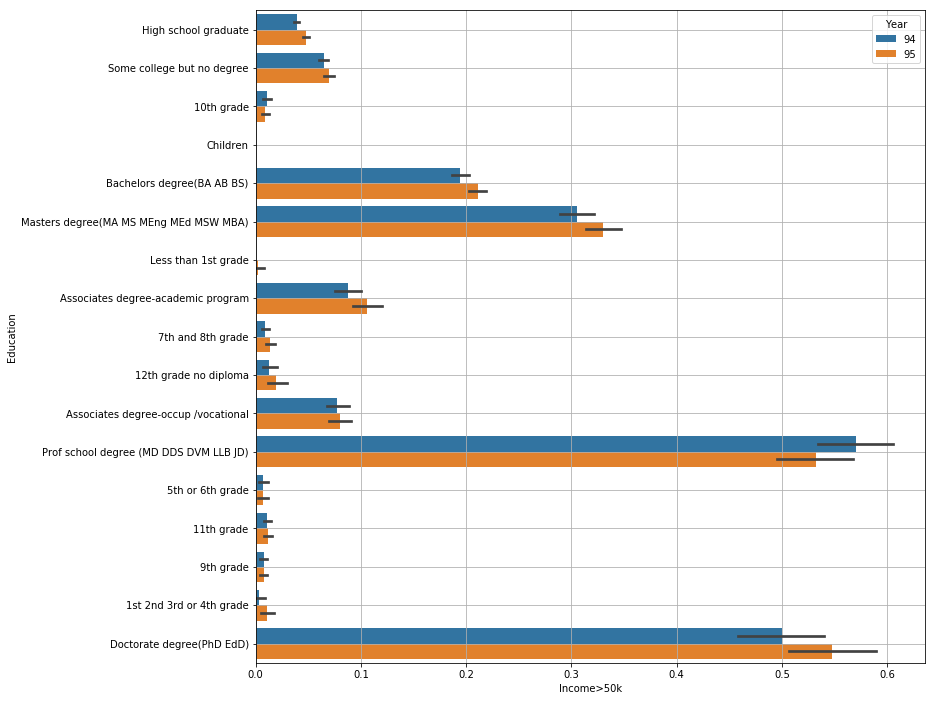

In [489]:
plt.figure(figsize=(12,12))
sns.barplot(y='Education', x='Income>50k', data=df, orient="h", hue='Year', dodge=True)
plt.grid(True)

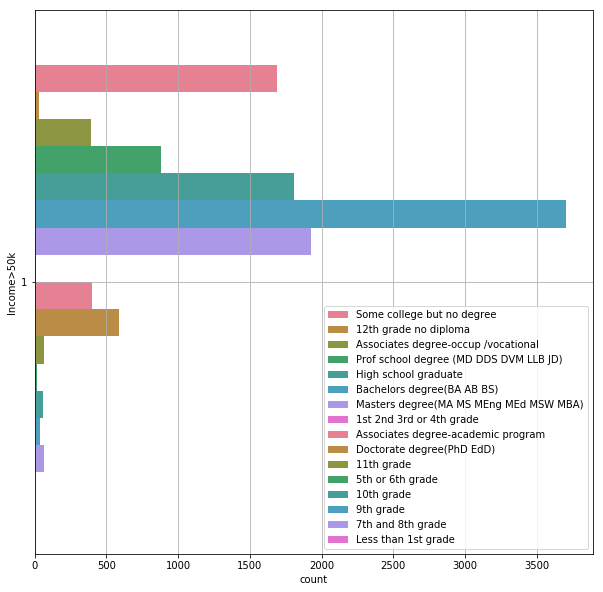

In [490]:
plt.figure(figsize=(10,10))
sns.countplot(y='Income>50k', hue='Education', data=df[df['Income>50k']==1],palette=sns.color_palette("husl", 8))
plt.grid()
plt.legend(fontsize='medium')

In [491]:
df['Education'].unique()

array(['High school graduate', 'Some college but no degree', '10th grade',
       'Children', 'Bachelors degree(BA AB BS)',
       'Masters degree(MA MS MEng MEd MSW MBA)', 'Less than 1st grade',
       'Associates degree-academic program', '7th and 8th grade',
       '12th grade no diploma', 'Associates degree-occup /vocational',
       'Prof school degree (MD DDS DVM LLB JD)', '5th or 6th grade',
       '11th grade', '9th grade', '1st 2nd 3rd or 4th grade',
       'Doctorate degree(PhD EdD)'], dtype=object)

In [492]:
#I will group all Education levels other than 'High school graduate', 'Some college but no degree',
#Bachelors degree(BA AB BS)' and 'Masters degree(MA MS MEng MEd MSW MBA)' as 'Other'
#I will also rename 'Some college but no degree' as 'High school graduate'.
    
df['Education'] = df['Education'].apply(lambda x: 'Other' if x not in ['High school graduate', 'Some college but no degree',
        'Bachelors degree(BA AB BS)','Masters degree(MA MS MEng MEd MSW MBA)', 
        'Prof school degree (MD DDS DVM LLB JD)', 'Doctorate degree(PhD EdD)'] else x)

df['Education'] = np.where(df['Education'] == 'Some college but no degree', 'High school graduate', df['Education'] )

df_test['Education'] = df_test['Education'].apply(lambda x: 'Other' if x not in ['High school graduate', 'Some college but no degree',
        'Bachelors degree(BA AB BS)','Masters degree(MA MS MEng MEd MSW MBA)', 
        'Prof school degree (MD DDS DVM LLB JD)', 'Doctorate degree(PhD EdD)'] else x)

df_test['Education'] = np.where(df_test['Education'] == 'Some college but no degree', 'High school graduate', df_test['Education'] )

<b>WagePerHour

In [493]:
df.columns

Index(['Age', 'ClassOfWorker', 'Education', 'WagePerHour', 'MaritalStatus',
       'MajorIndustryCode', 'MajorOccupationCode', 'Race', 'HispanicOrigin',
       'Sex', 'FullOrPartTime', 'CapitalGains', 'CapitalLosses',
       'StockDividends', 'TaxFilerStat', 'HouseholdFamilyStatus',
       'HouseholdSummary', 'LiveInHouse1Y', 'NumPersonsWorkedEmployer',
       'CountryBirthFather', 'CountryBirthMother', 'CountryBirthSelf',
       'Citizenship', 'OwnBusiness', 'VeteranBenefits', 'WeeksWorkedInY',
       'Year', 'Income>50k'],
      dtype='object')

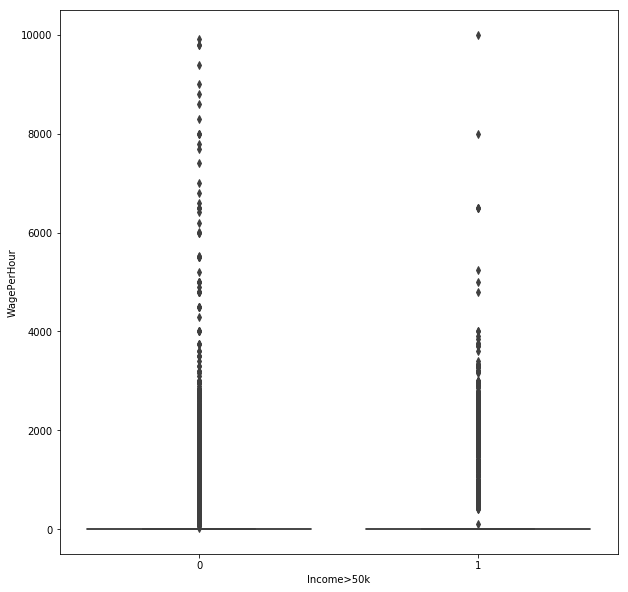

In [494]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Income>50k', y='WagePerHour', data=df)

In [495]:
df.groupby('WagePerHour')['Age'].count()

WagePerHour
0       134017
20           1
70           1
75           2
100         11
110          1
125          1
135          1
143          1
150          6
170          1
173          1
190          1
200         27
205          1
210          7
212          2
213         20
215          2
220          2
225          4
230          1
232          1
233          1
234          1
235          2
245          1
250         11
252          1
255          3
         ...  
4300         1
4500         4
4800         1
4807         5
4900         1
5000         5
5200         1
5250         1
5500         4
5525         1
6000         2
6009         1
6200         1
6410         1
6500         6
6600         1
6800         1
7000         1
7400         1
7700         1
7800         1
8000         4
8300         1
8600         1
8800         1
9000         1
9400         1
9800         2
9916         1
9999         1
Name: Age, Length: 1227, dtype: int64

<Figure size 720x720 with 0 Axes>

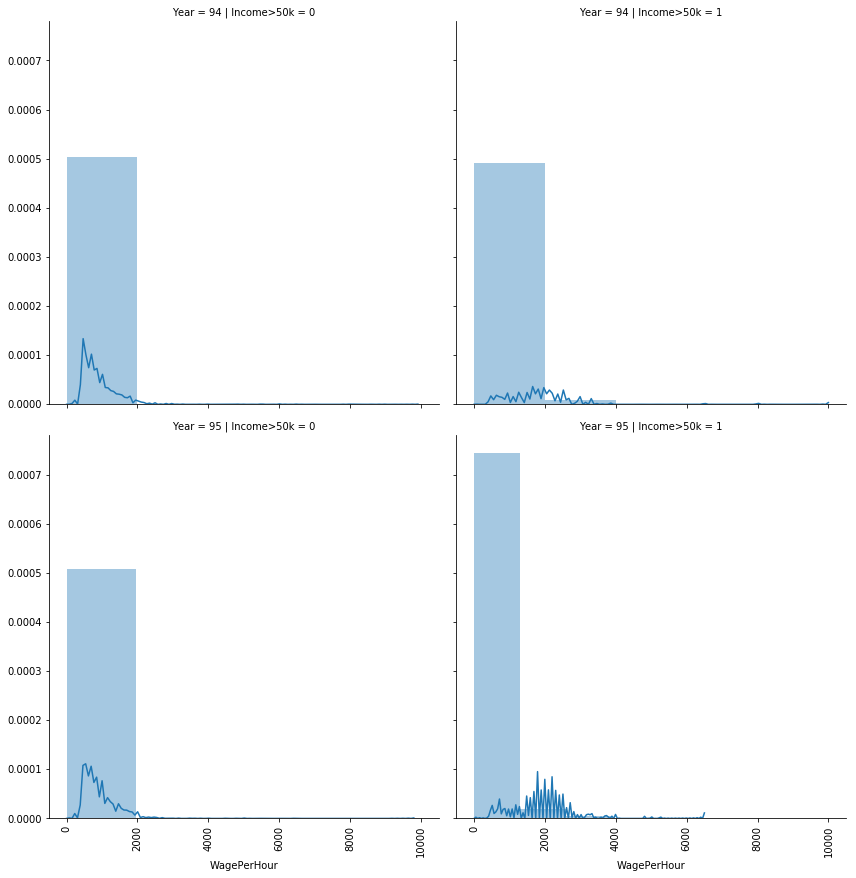

In [496]:
plt.figure(figsize=(10,10))

g = sns.FacetGrid(data=df, col='Income>50k', row='Year', height=6)
g.map(sns.distplot, 'WagePerHour', bins=5)
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=90) # set new labels

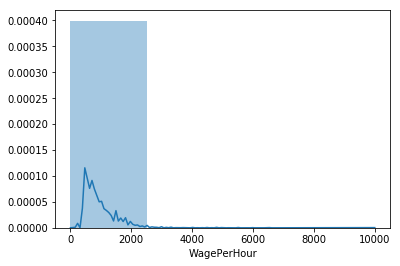

In [497]:
sns.distplot(df['WagePerHour'], bins=4)

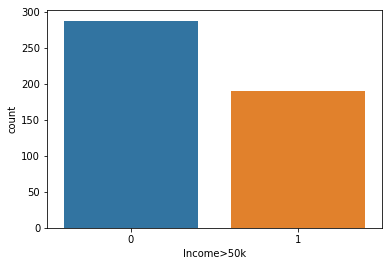

In [498]:
sns.countplot(x='Income>50k', data=df[df['WagePerHour']>2000])

#It looks like the WagePerHouse has some wrong inputs. I might delete the rows, but a big oercentage of them are positive 
for Income>50K. I will cap the Wages at $2000 per hour.

In [499]:
#I will cap the WagePerHour to $2,000. Higher numbers do not seem to be correct.

df['WagePerHour'] = np.where(df['WagePerHour'] > 2000, 2000, df['WagePerHour'])
df_test['WagePerHour'] = np.where(df_test['WagePerHour'] > 2000, 2000, df_test['WagePerHour'])

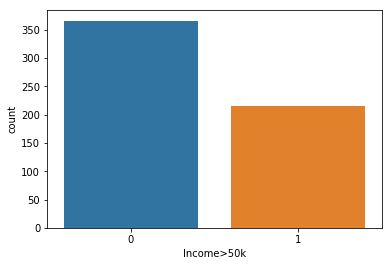

In [500]:
sns.countplot(x='Income>50k', data=df[df['WagePerHour']== 2000])

<b> Marital Status

In [501]:
df['MaritalStatus'].value_counts()

Married-civilian spouse present    73979
Never married                      45594
Divorced                           12046
Widowed                             8032
Separated                           3325
Married-spouse absent               1396
Married-A F spouse present           633
Name: MaritalStatus, dtype: int64

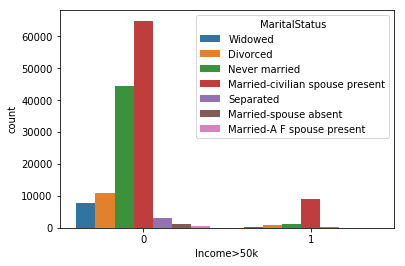

In [502]:
sns.countplot(x='Income>50k', hue='MaritalStatus', data=df)

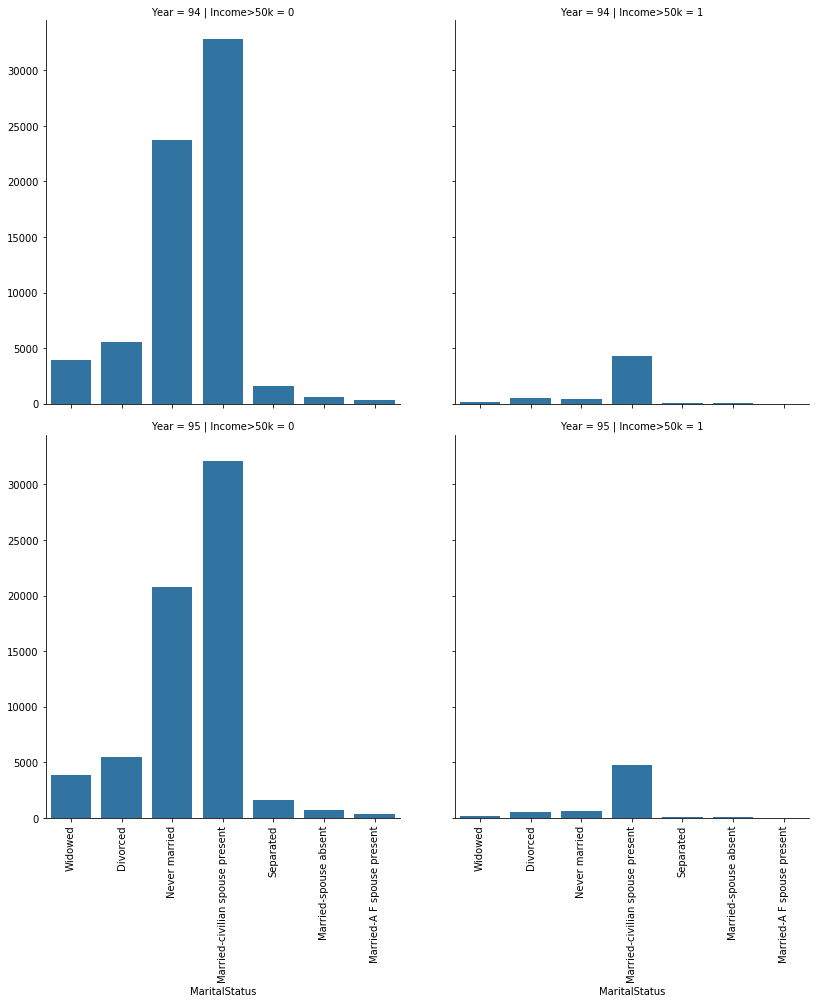

In [503]:
g = sns.FacetGrid(data=df, col='Income>50k', row='Year', height=6)
g.map(sns.countplot, 'MaritalStatus', order=df['MaritalStatus'].unique())
g.set_xticklabels(rotation=30)

for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=90) # set new labels

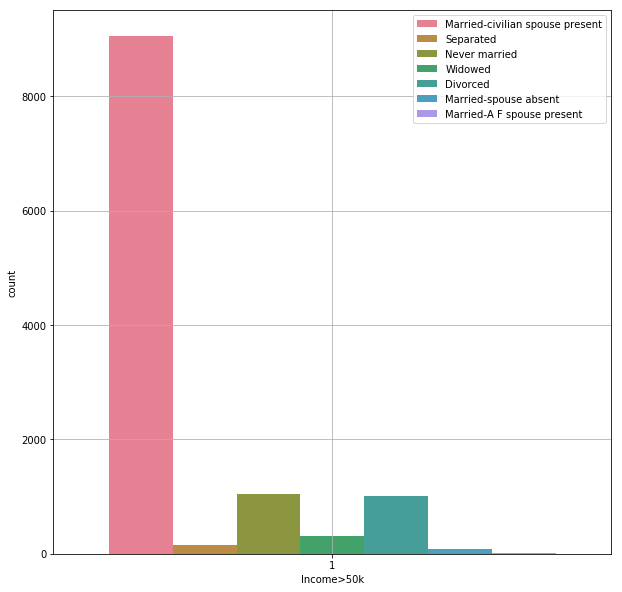

In [504]:
plt.figure(figsize=(10,10))
sns.countplot(x='Income>50k', hue='MaritalStatus', data=df[df['Income>50k']==1],palette=sns.color_palette("husl", 8))
plt.grid()
plt.legend(fontsize='medium')


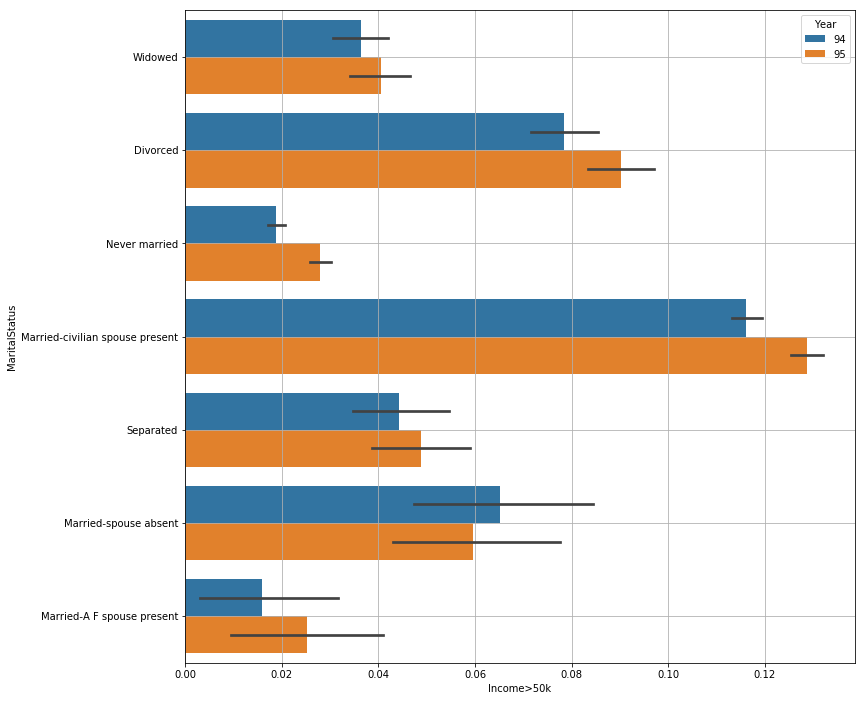

In [505]:
plt.figure(figsize=(12,12))
sns.barplot(y='MaritalStatus', x='Income>50k', data=df, orient="h", hue='Year', dodge=True)
plt.grid(True)

In [506]:
df['MaritalStatus'].unique()

array(['Widowed', 'Divorced', 'Never married',
       'Married-civilian spouse present', 'Separated',
       'Married-spouse absent', 'Married-A F spouse present'], dtype=object)

In [507]:
#I will join some values under two: Married and Divorced
df['MaritalStatus'] = df['MaritalStatus'].apply(lambda x: 'Divorced' if x in ['Divorced','Separated'] 
                else 'Married' if x in ['Married-civilian spouse present', 'Married-spouse absent', 'Married-A F spouse present']
                else x)

df_test['MaritalStatus'] = df_test['MaritalStatus'].apply(lambda x: 'Divorced' if x in ['Divorced','Separated'] 
                else 'Married' if x in ['Married-civilian spouse present', 'Married-spouse absent', 'Married-A F spouse present']
                else x)

In [508]:
df['MaritalStatus'].value_counts()

Married          76008
Never married    45594
Divorced         15371
Widowed           8032
Name: MaritalStatus, dtype: int64

<b>Race

In [509]:
df['Race'].value_counts()

White                          120679
Black                           14424
Asian or Pacific Islander        4896
Other                            3154
Amer Indian Aleut or Eskimo      1852
Name: Race, dtype: int64

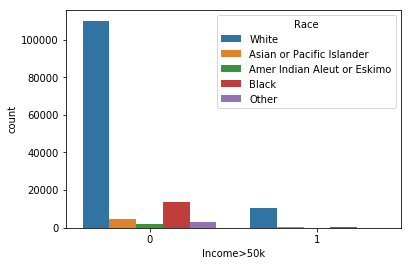

In [510]:
sns.countplot(x='Income>50k', hue='Race', data=df)

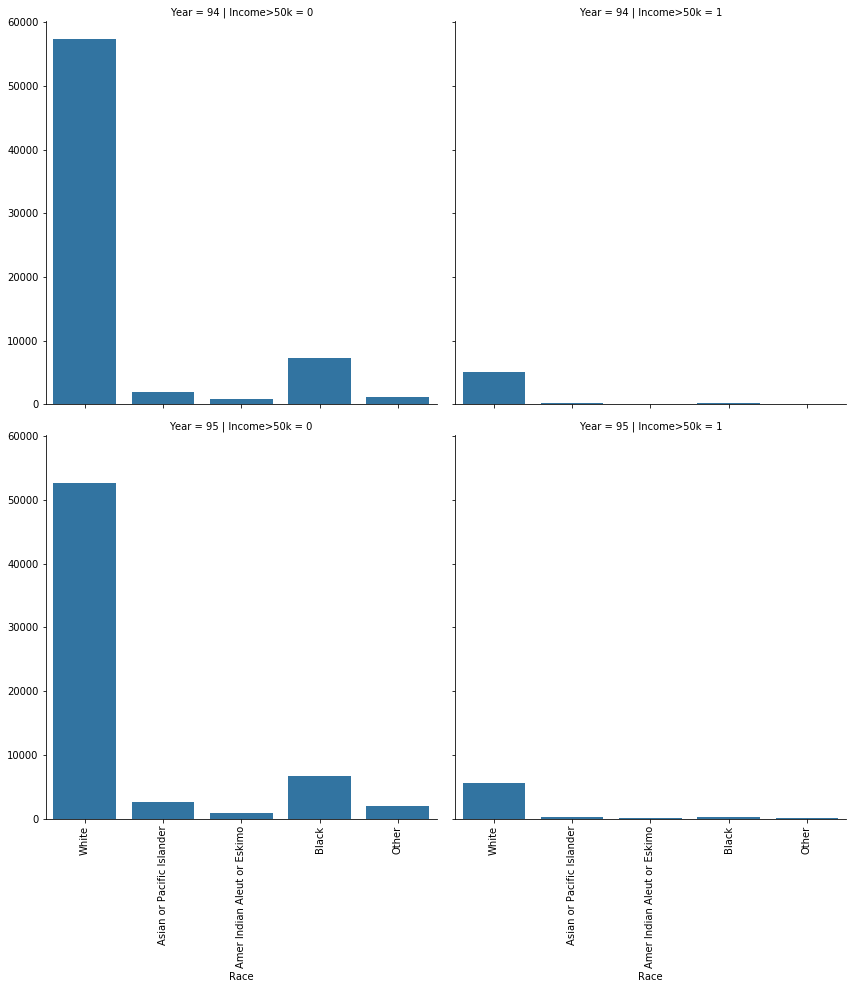

In [511]:
g = sns.FacetGrid(data=df, col='Income>50k', row='Year', height=6)
g.map(sns.countplot, 'Race', order=df['Race'].unique())
g.set_xticklabels(rotation=30)

for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=90) # set new labels

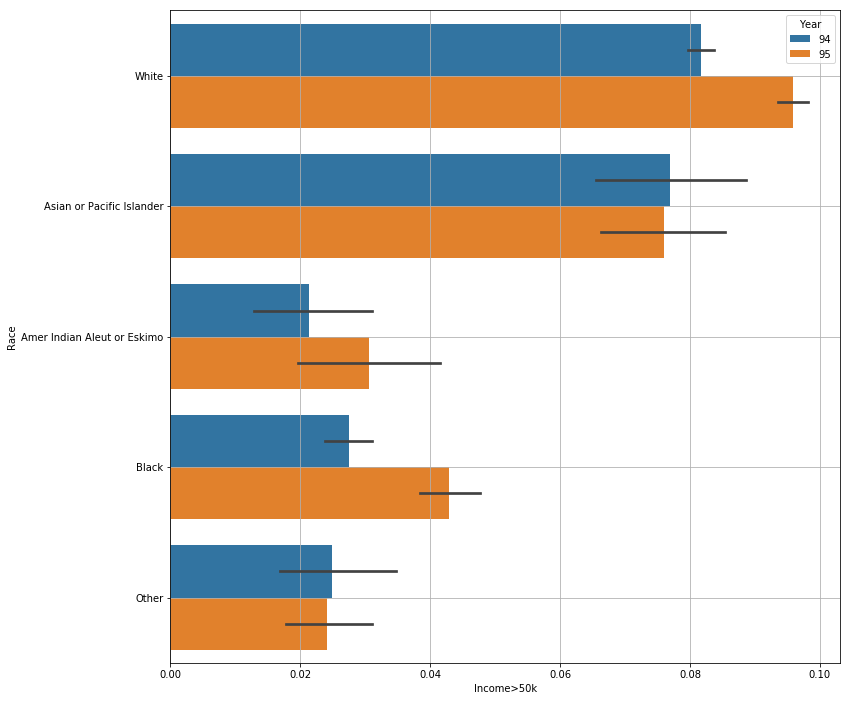

In [512]:
plt.figure(figsize=(12,12))
sns.barplot(y='Race', x='Income>50k', data=df, orient="h", hue='Year', dodge=True)
plt.grid(True)

In [513]:
#I will add 'Amer Indian Aleut or Eskimo' to 'Other'
df['Race'] = df['Race'].apply(lambda x: 'Other' if x == 'Amer Indian Aleut or Eskimo' else x)
df_test['Race'] = df_test['Race'].apply(lambda x: 'Other' if x == 'Amer Indian Aleut or Eskimo' else x)

<b>HispanicOrigin

In [514]:
df['HispanicOrigin'].value_counts(normalize=True)

All other                    0.842978
Mexican (Mexicano)           0.043364
Mexican-American             0.041185
Central or South American    0.021323
Puerto Rican                 0.020068
Other Spanish                0.014606
Cuban                        0.006862
NA                           0.005593
Chicano                      0.002034
Do not know                  0.001986
Name: HispanicOrigin, dtype: float64

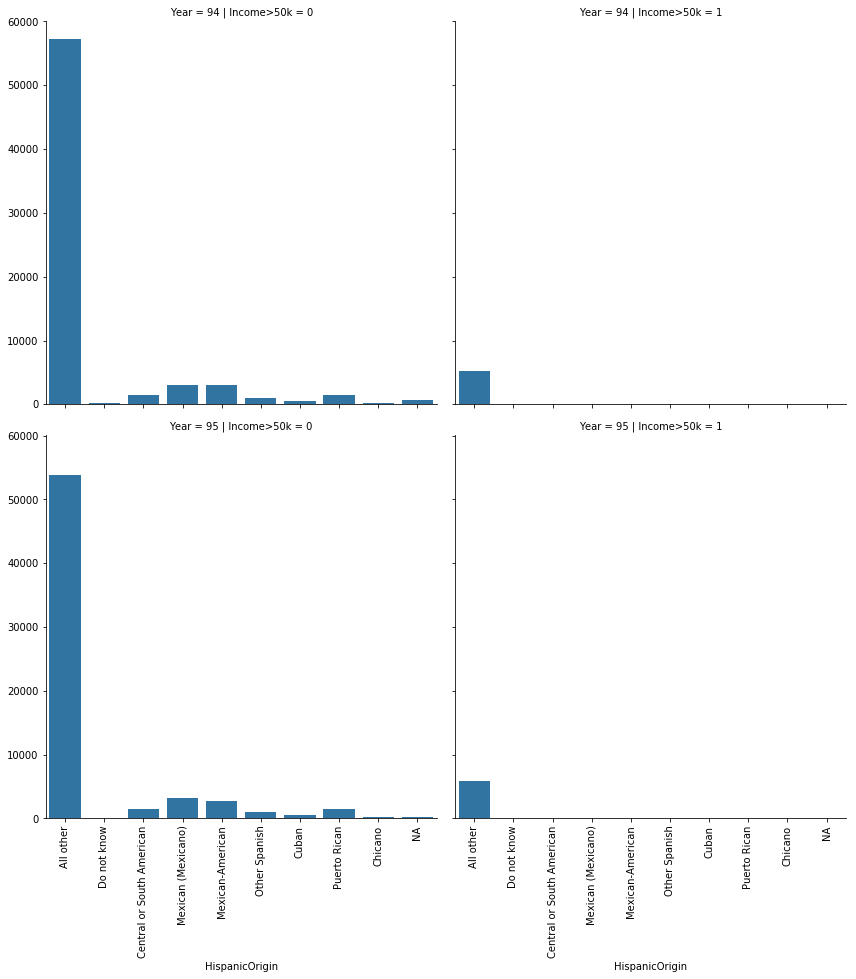

In [515]:
g = sns.FacetGrid(data=df, col='Income>50k', row='Year', height=6)
g.map(sns.countplot, 'HispanicOrigin', order=df['HispanicOrigin'].unique())
g.set_xticklabels(rotation=30)

for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=90) # set new labels

In [516]:
df['HispanicOrigin'].replace('All other', 'NA', inplace=True)
df_test['HispanicOrigin'].replace('All other', 'NA', inplace=True)

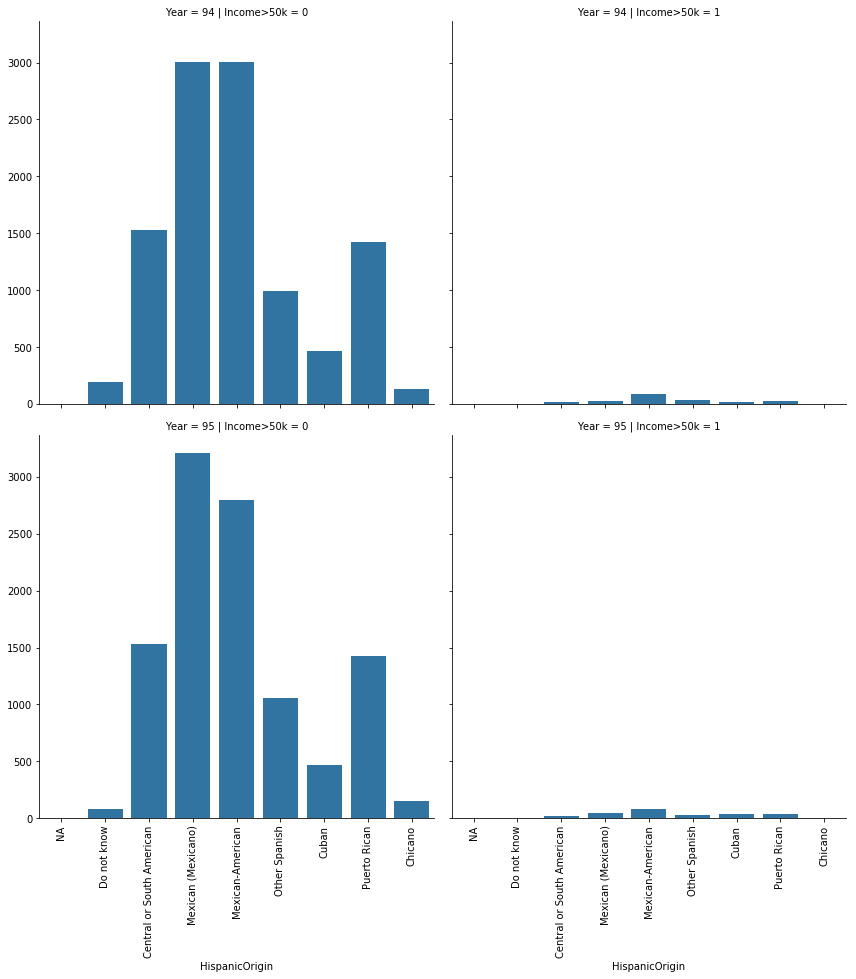

In [517]:
g = sns.FacetGrid(data=df[df['HispanicOrigin'] !='NA'], col='Income>50k', row='Year', height=6)
g.map(sns.countplot, 'HispanicOrigin', order=df['HispanicOrigin'].unique())
g.set_xticklabels(rotation=30)

for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=90) # set new labels

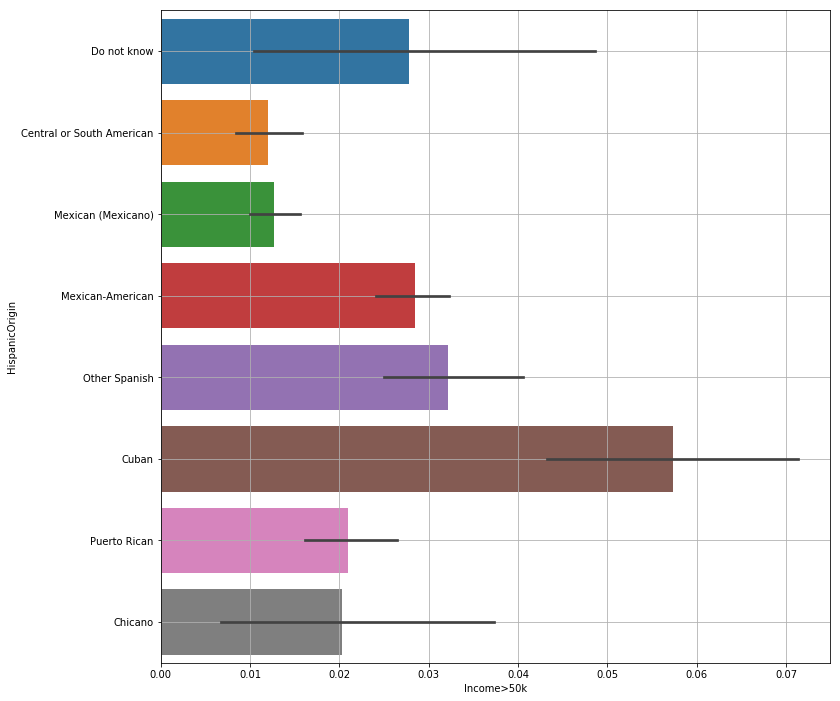

In [518]:
plt.figure(figsize=(12,12))
sns.barplot(y='HispanicOrigin', x='Income>50k', data=df[df['HispanicOrigin'] !='NA'], orient="h", dodge=True)
plt.grid(True)

In [519]:
#I will drop this column. I will only be relying on Race
df.drop('HispanicOrigin', axis=1, inplace=True)
df_test.drop('HispanicOrigin', axis=1, inplace=True)

<b>Sex

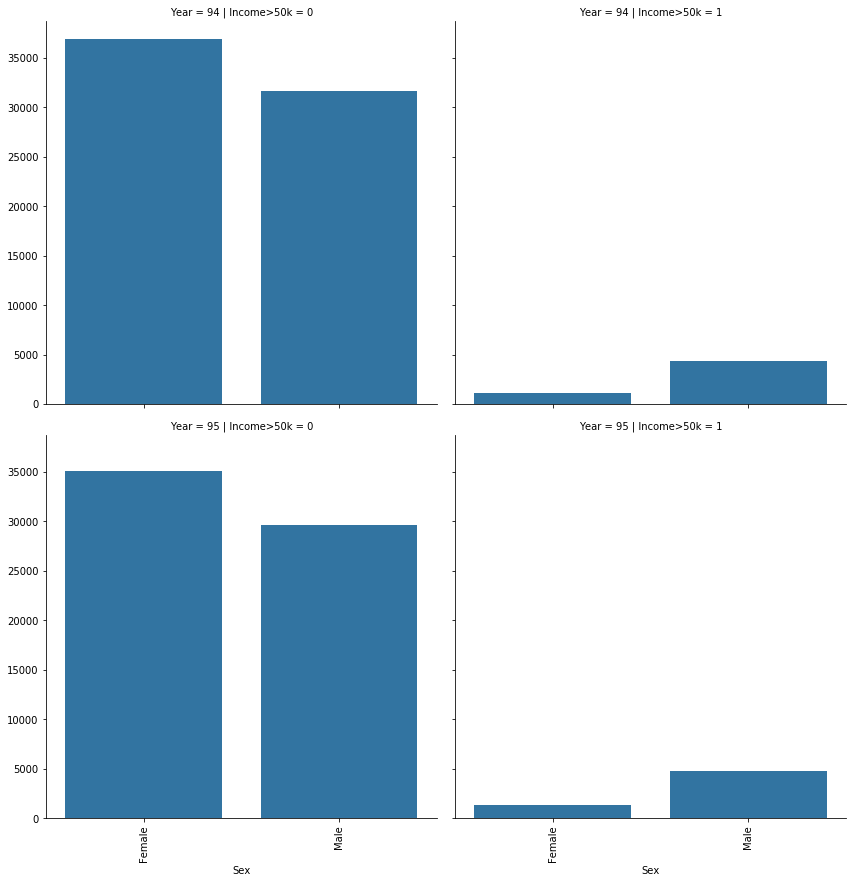

In [520]:
g = sns.FacetGrid(data=df, col='Income>50k', row='Year', height=6)
g.map(sns.countplot, 'Sex', order=df['Sex'].unique())

for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=90) # set new labels

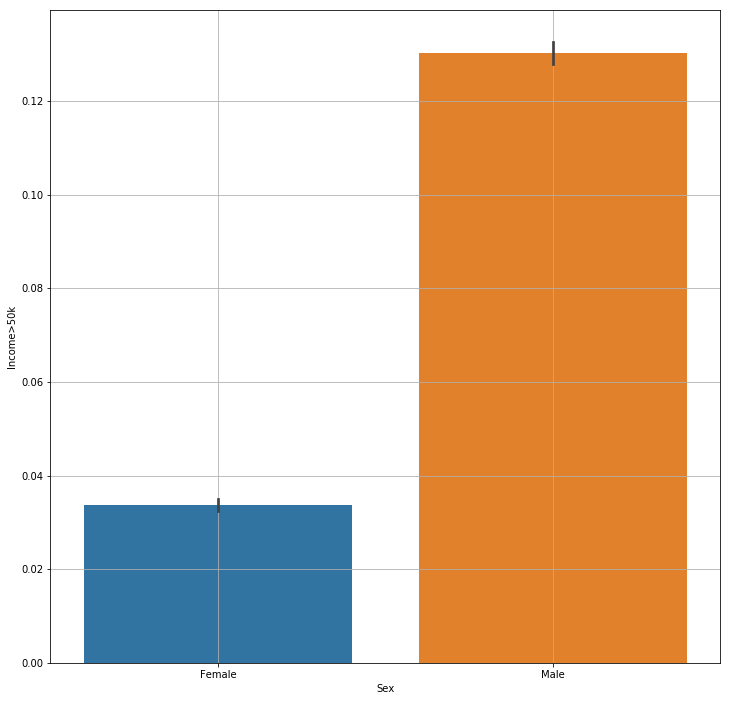

In [521]:
plt.figure(figsize=(12,12))
sns.barplot(x='Sex', y='Income>50k', data=df,  dodge=True)
plt.grid(True)

In [522]:
df.rename(columns={'Sex':'Male'}, inplace=True)
df['Male'] = np.where(df['Male']=='Male',1,0)
df_test.rename(columns={'Sex':'Male'}, inplace=True)
df_test['Male'] = np.where(df_test['Male']=='Male',1,0)

<b>FullOrPartTime

In [523]:
df['FullOrPartTime'].value_counts()

Children or Armed Forces              78981
Full-time schedules                   38956
Not in labor force                    19201
PT for non-econ reasons usually FT     3210
Unemployed full-time                   2200
PT for econ reasons usually PT         1166
Unemployed part- time                   779
PT for econ reasons usually FT          512
Name: FullOrPartTime, dtype: int64

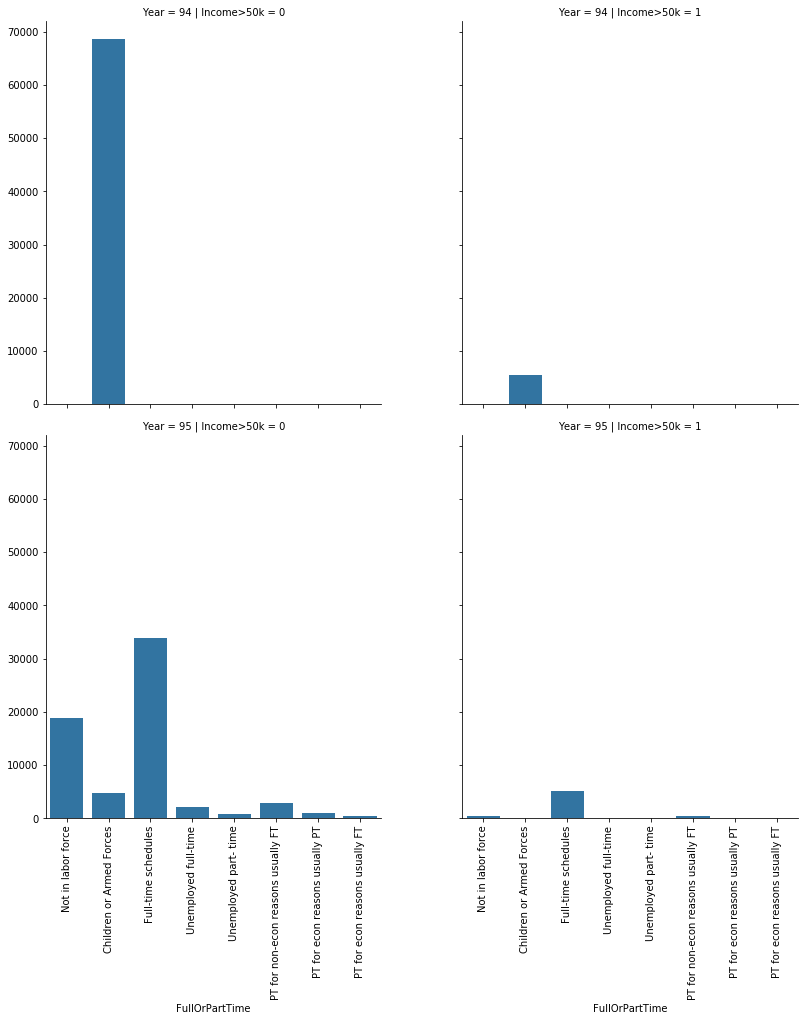

In [524]:
g = sns.FacetGrid(data=df, col='Income>50k', row='Year', height=6)
g.map(sns.countplot, 'FullOrPartTime', order=df['FullOrPartTime'].unique() )
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=90) # set new labels

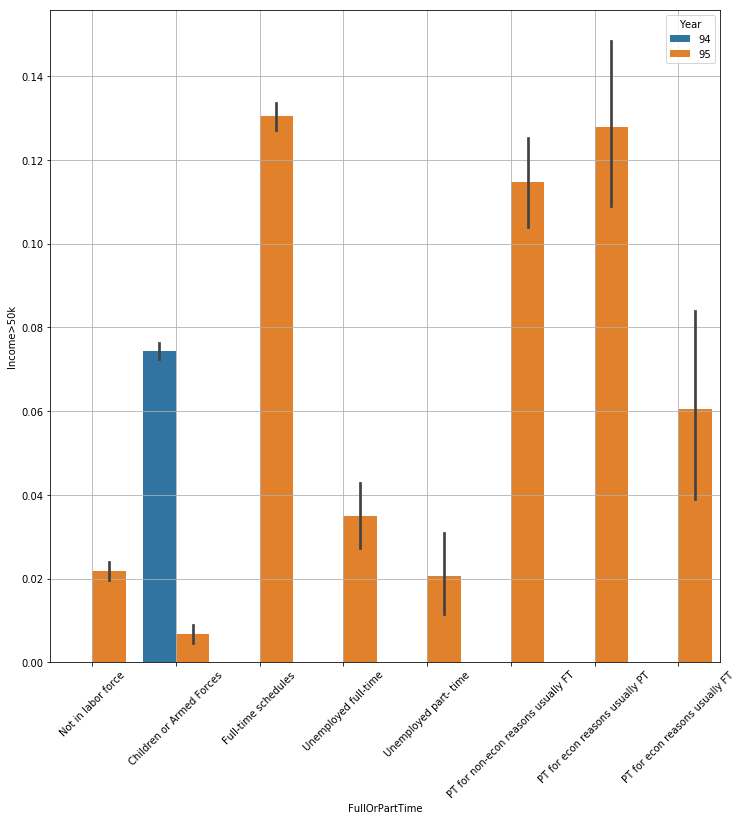

In [525]:
plt.figure(figsize=(12,12))
sns.barplot(x='FullOrPartTime', y='Income>50k', data=df,  hue='Year', dodge=True)
plt.xticks(rotation=45)
plt.grid(True)

Looks like the data for this column is missing for 1994. It doesn't make sense that all those who answered the survey in 1994 are of the same type


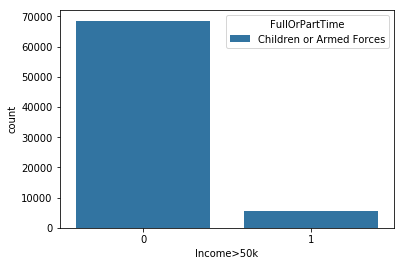

In [526]:
sns.countplot(x='Income>50k', hue='FullOrPartTime', data=df[df['Year']==94])

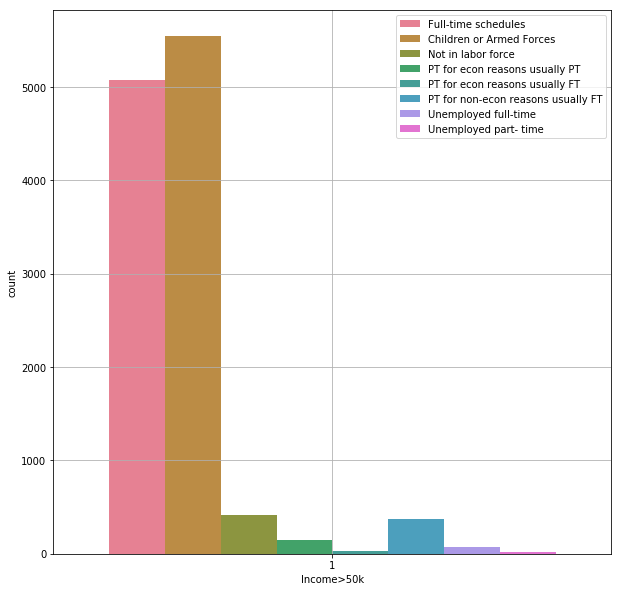

In [527]:
plt.figure(figsize=(10,10))
sns.countplot(x='Income>50k', hue='FullOrPartTime', data=df[df['Income>50k']==1],palette=sns.color_palette("husl", 8))
plt.grid()
plt.legend(fontsize='medium')

Even though this columns seems to be correlated with Income levels, but I will have to drop it as I cannot impute the values of 1994

In [528]:
df.drop('FullOrPartTime', axis=1, inplace=True)
df_test.drop('FullOrPartTime', axis=1, inplace=True)

<b>CapitalGains & CapitalLosses

In [529]:
df['CapitalGains'].describe()

count    145005.000000
mean        557.842136
std        5286.552736
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       99999.000000
Name: CapitalGains, dtype: float64

<Figure size 720x720 with 0 Axes>

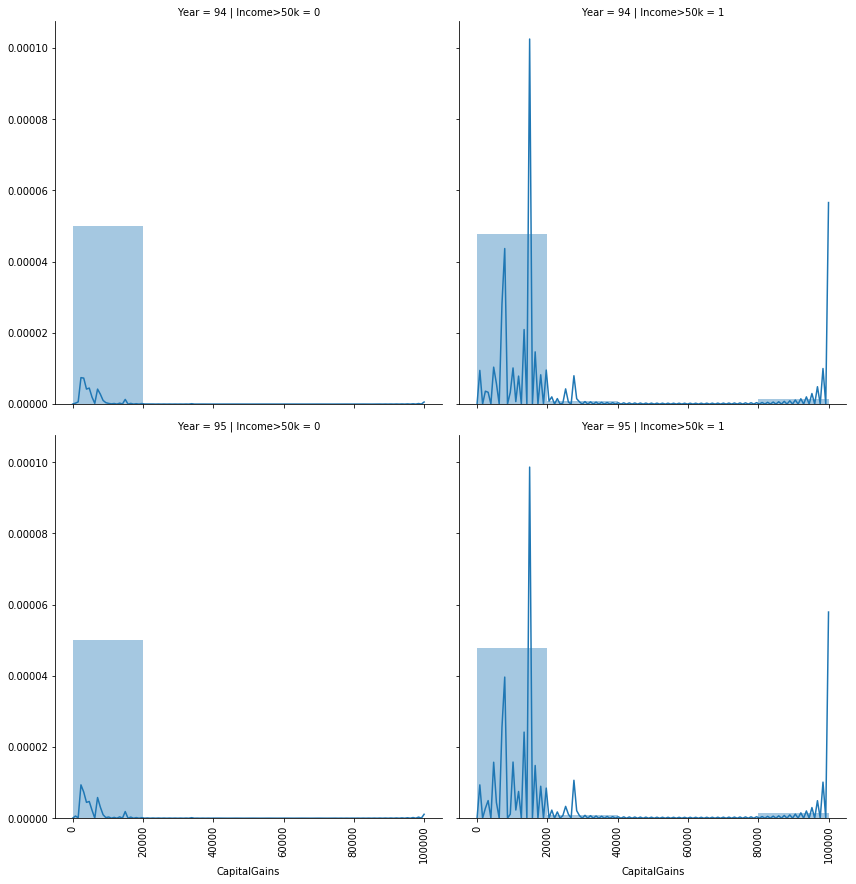

In [530]:
plt.figure(figsize=(10,10))
g = sns.FacetGrid(data=df, col='Income>50k', row='Year', height=6)
g.map(sns.distplot, 'CapitalGains', bins=5)
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=90) # set new labels

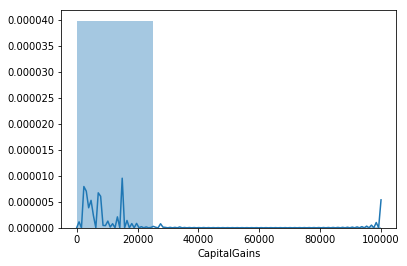

In [531]:
sns.distplot(df['CapitalGains'], bins=4)

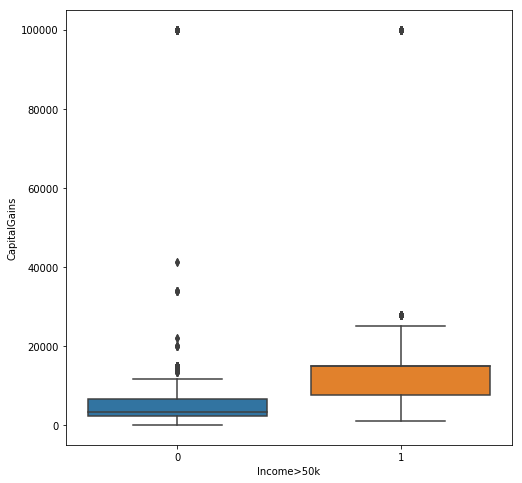

In [532]:
plt.figure(figsize=(8,8))
sns.boxplot(y='CapitalGains', x='Income>50k', data=df[df['CapitalGains']>0])

In [533]:
df['CapitalLosses'].describe()

count    145005.000000
mean         48.684659
std         308.852831
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        4608.000000
Name: CapitalLosses, dtype: float64

<Figure size 720x720 with 0 Axes>

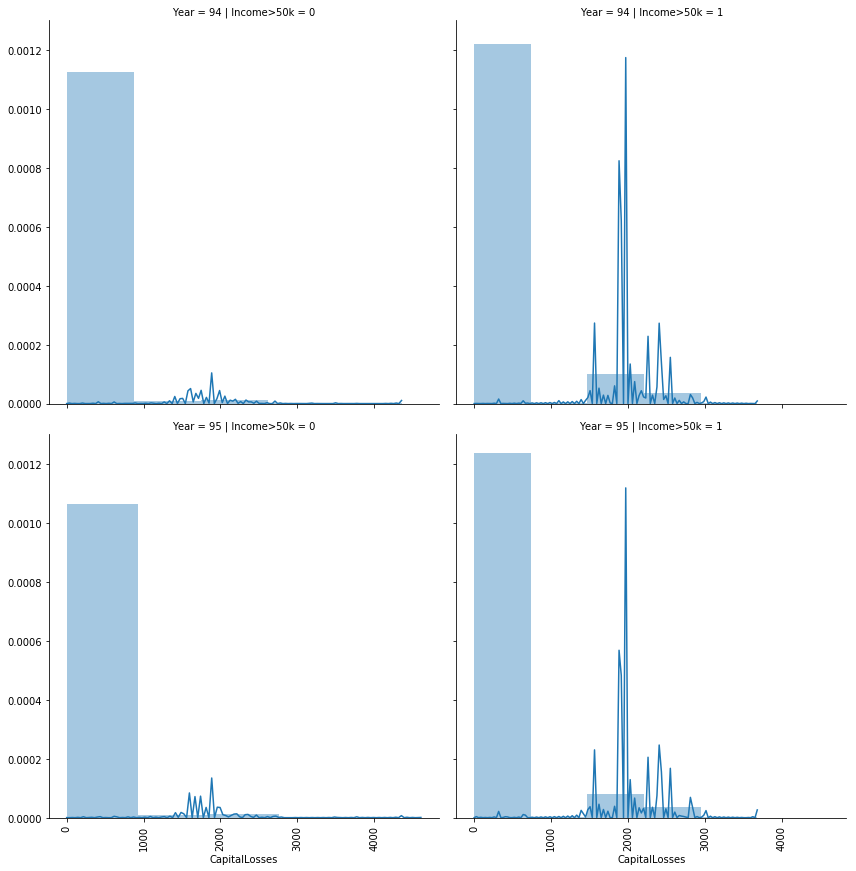

In [534]:
plt.figure(figsize=(10,10))
g = sns.FacetGrid(data=df, col='Income>50k', row='Year', height=6)
g.map(sns.distplot, 'CapitalLosses', bins=5)
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=90) # set new labels

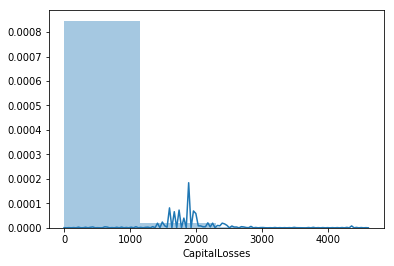

In [535]:
sns.distplot(df['CapitalLosses'], bins=4)

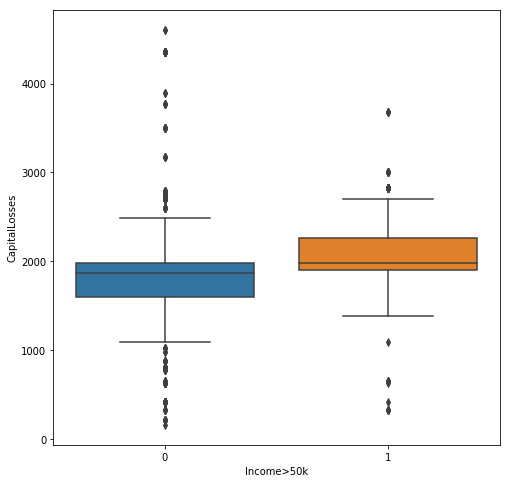

In [536]:
plt.figure(figsize=(8,8))
sns.boxplot(y='CapitalLosses', x='Income>50k', data=df[df['CapitalLosses']>0])

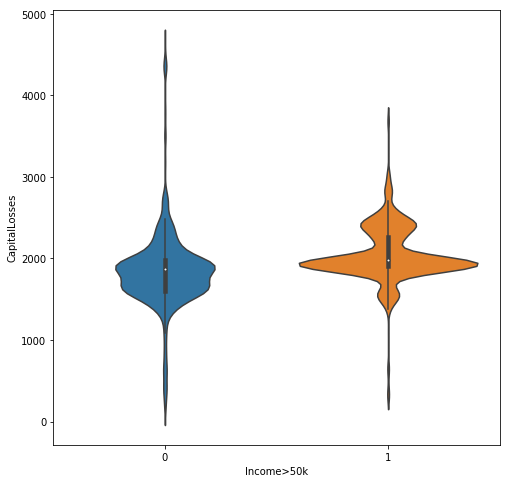

In [537]:
plt.figure(figsize=(8,8))
sns.violinplot(y='CapitalLosses', x='Income>50k', data=df[df['CapitalLosses']>0])

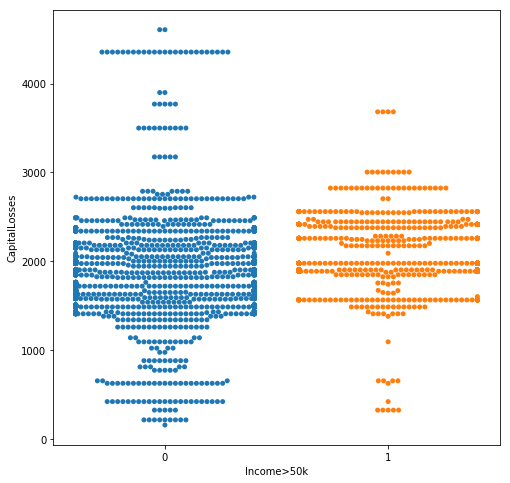

In [538]:
plt.figure(figsize=(8,8))
sns.swarmplot(y='CapitalLosses', x='Income>50k', data=df[df['CapitalLosses']>0])

This is unexpected, since higher income should probably mean lower Capital Losses.

<b>StockDividends

In [539]:
df['StockDividends'].describe()

count    145005.000000
mean        252.061688
std        2260.621084
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       99999.000000
Name: StockDividends, dtype: float64

<Figure size 720x720 with 0 Axes>

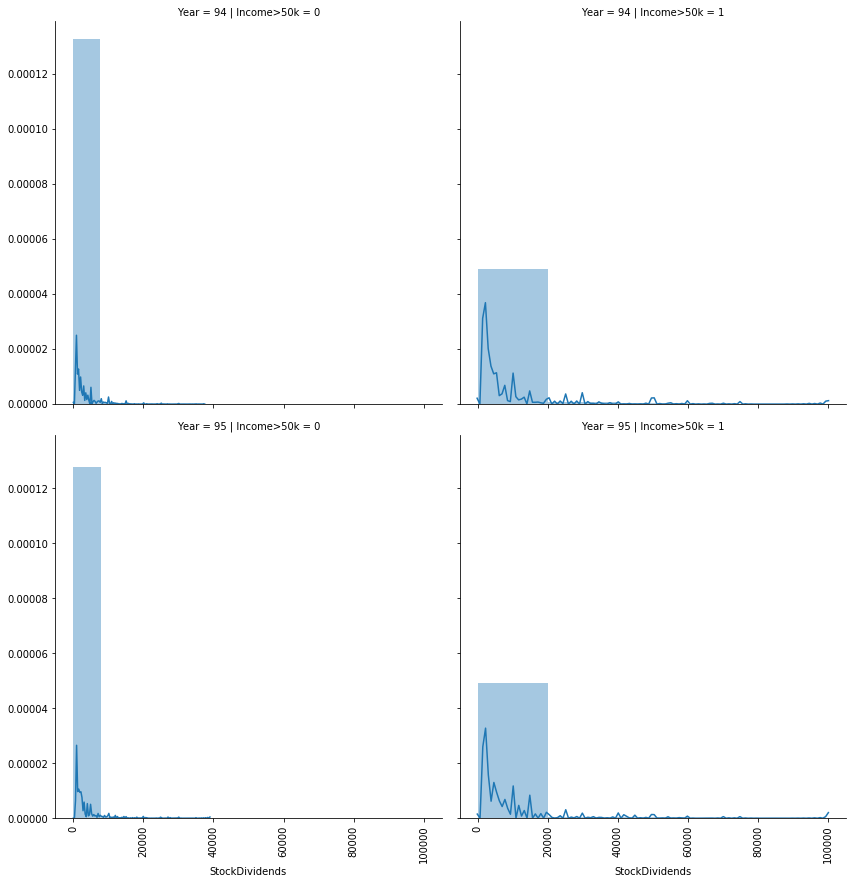

In [540]:
plt.figure(figsize=(10,10))
g = sns.FacetGrid(data=df, col='Income>50k', row='Year', height=6)
g.map(sns.distplot, 'StockDividends', bins=5)
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=90) # set new labels

(0, 30000)

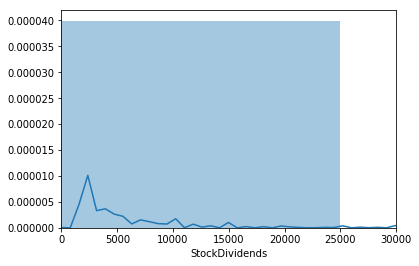

In [541]:
sns.distplot(df['StockDividends'], bins=4)
plt.xlim(0,30000)

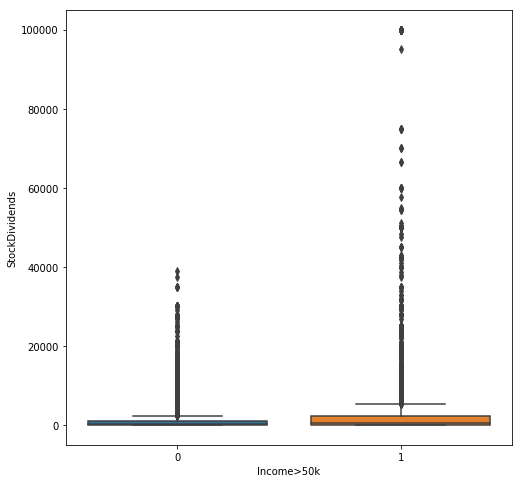

In [542]:
plt.figure(figsize=(8,8))
sns.boxplot(y='StockDividends', x='Income>50k', data=df[df['StockDividends']>0])

<b>TaxFilerStat

In [543]:
df['TaxFilerStat'].describe()

count                  145005
unique                      6
top       Joint both under 65
freq                    61723
Name: TaxFilerStat, dtype: object

In [544]:
df['TaxFilerStat'].value_counts()

Joint both under 65             61723
Single                          34850
Nonfiler                        32260
Head of household                7195
Joint both 65+                   5767
Joint one under 65 & one 65+     3210
Name: TaxFilerStat, dtype: int64

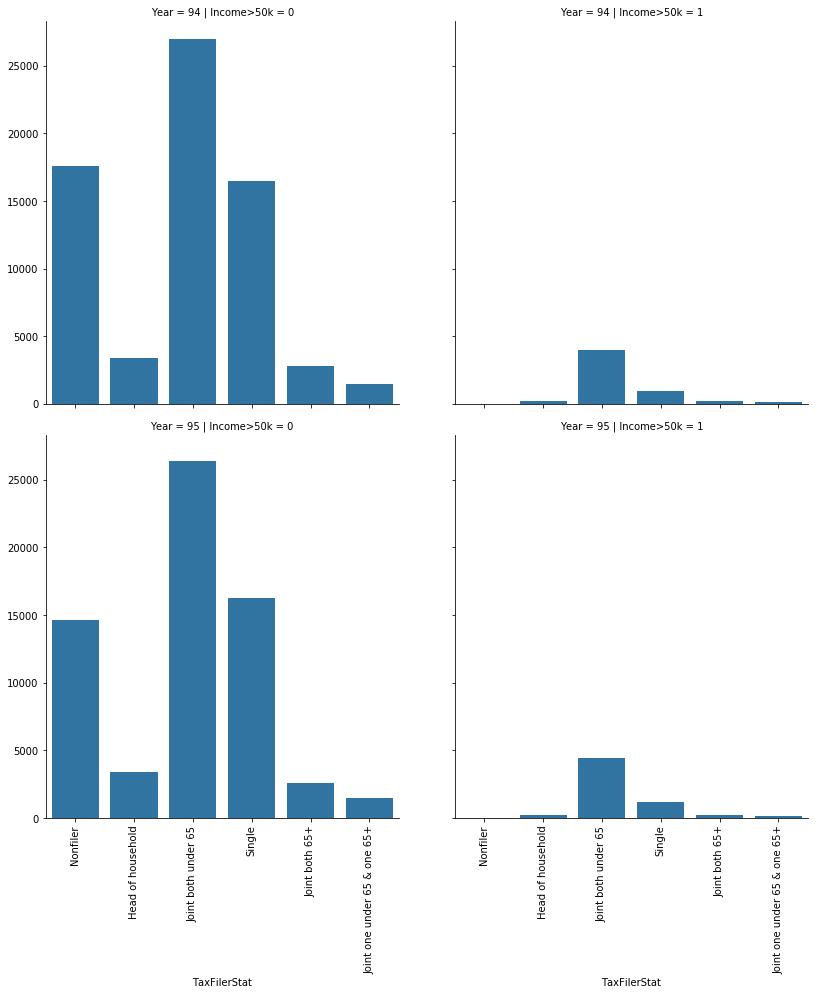

In [545]:
g = sns.FacetGrid(data=df, col='Income>50k', row='Year', height=6)
g.map(sns.countplot, 'TaxFilerStat', order=df['TaxFilerStat'].unique() )
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=90) # set new labels

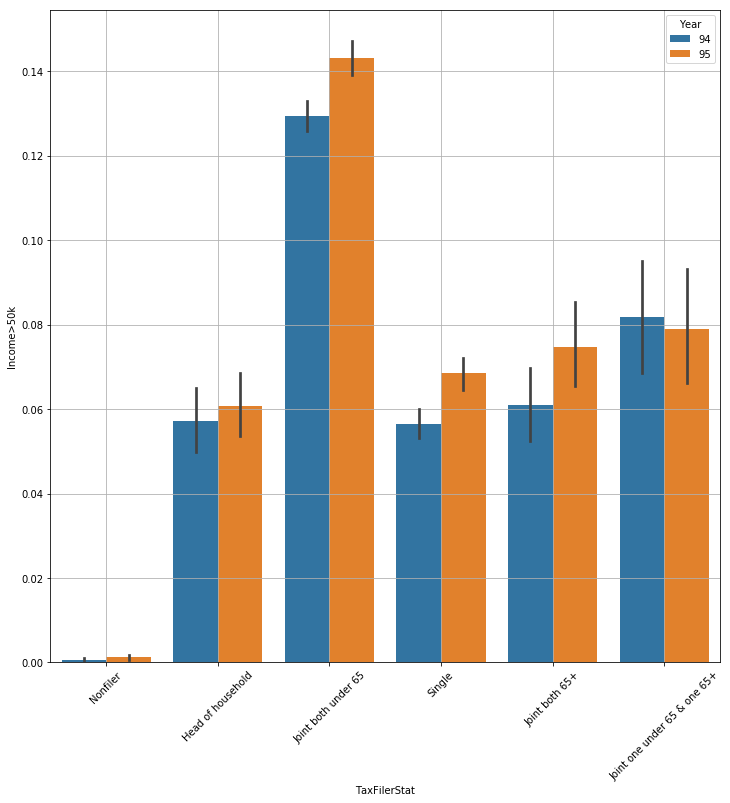

In [546]:
plt.figure(figsize=(12,12))
sns.barplot(x='TaxFilerStat', y='Income>50k', data=df,  hue='Year', dodge=True)
plt.xticks(rotation=45)
plt.grid(True)

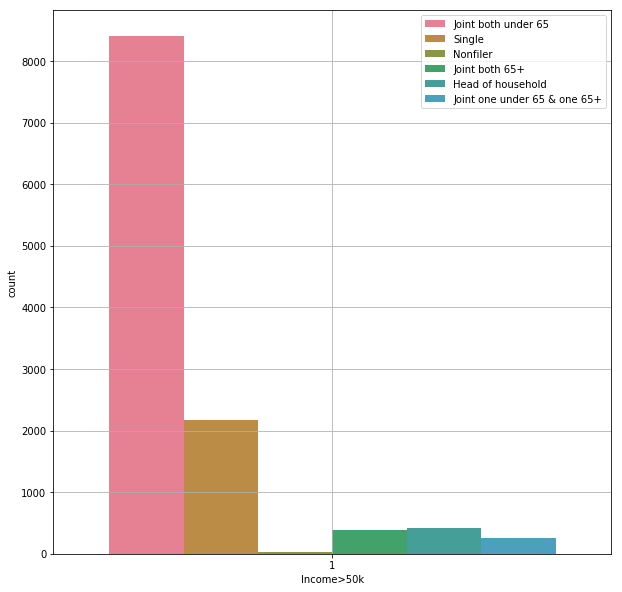

In [547]:
plt.figure(figsize=(10,10))
sns.countplot(x='Income>50k', hue='TaxFilerStat', data=df[df['Income>50k']==1],palette=sns.color_palette("husl", 8))
plt.grid()
plt.legend(fontsize='medium')

In [548]:
#Group the values: ['Head of household', 'Joint both 65+', 'Joint one under 65 & one 65+'] as 'Other'
df['TaxFilerStat'] = df['TaxFilerStat'].apply(lambda x: 'Other' if x in ['Head of household', 'Joint both 65+', 'Joint one under 65 & one 65+'] else x)
df_test['TaxFilerStat'] = df_test['TaxFilerStat'].apply(lambda x: 'Other' if x in ['Head of household', 'Joint both 65+', 'Joint one under 65 & one 65+'] else x)

<b>HouseholdFamilyStatus

In [549]:
df['HouseholdFamilyStatus'].describe()

count          145005
unique             38
top       Householder
freq            48707
Name: HouseholdFamilyStatus, dtype: object

In [550]:
df['HouseholdFamilyStatus'].value_counts()

Householder                                        48707
Spouse of householder                              35347
Nonfamily householder                              19255
Child <18 never marr not in subfamily              14015
Child 18+ never marr Not in a subfamily            10969
Secondary individual                                5711
Other Rel 18+ ever marr not in subfamily            1709
Other Rel 18+ never marr not in subfamily           1611
Child 18+ ever marr Not in a subfamily               991
Grandchild <18 never marr child of subfamily RP      799
RP of unrelated subfamily                            663
Child 18+ ever marr RP of subfamily                  652
Other Rel 18+ ever marr RP of subfamily              609
Other Rel 18+ spouse of subfamily RP                 591
Child 18+ never marr RP of subfamily                 569
Other Rel <18 never marr child of subfamily RP       515
Grandchild <18 never marr not in subfamily           485
Child under 18 of RP of unrel s

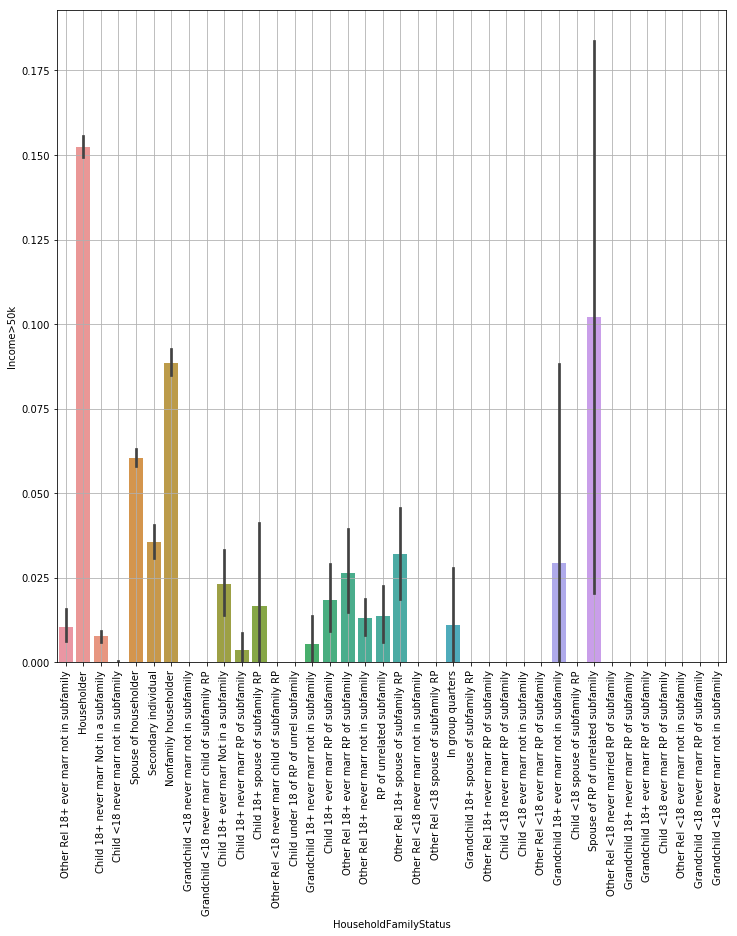

In [551]:
plt.figure(figsize=(12,12))
sns.barplot(x='HouseholdFamilyStatus', y='Income>50k', data=df, dodge=True)
plt.xticks(rotation=90)
plt.grid(True)

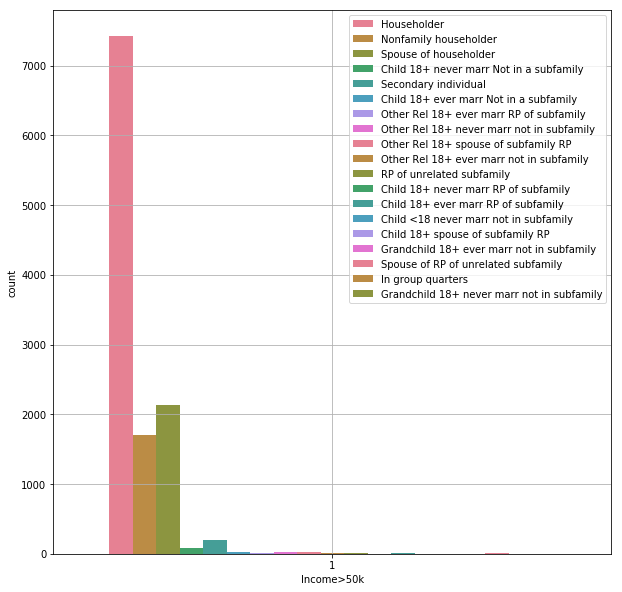

In [552]:
plt.figure(figsize=(10,10))
sns.countplot(x='Income>50k', hue='HouseholdFamilyStatus', data=df[df['Income>50k']==1],palette=sns.color_palette("husl", 8))
plt.grid()
plt.legend(fontsize='medium')

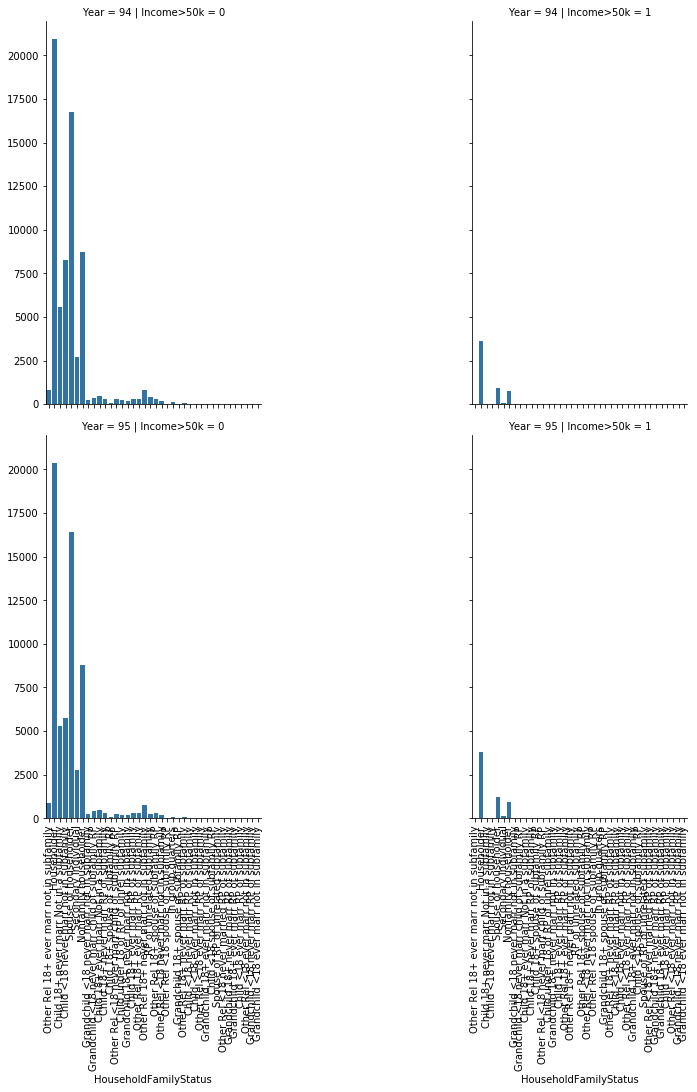

In [553]:
g = sns.FacetGrid(data=df, col='Income>50k', row='Year', height=6)
g.map(sns.countplot, 'HouseholdFamilyStatus', order=df['HouseholdFamilyStatus'].unique() )
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=90) # set new labels

In [554]:
#To simplify the model, I will replace all small values with Other
df['HouseholdFamilyStatus'] = df['HouseholdFamilyStatus'].apply(lambda x: 'Other' if x not in ['Householder','Spouse of householder','Nonfamily householder'] else x)
df_test['HouseholdFamilyStatus'] = df_test['HouseholdFamilyStatus'].apply(lambda x: 'Other' if x not in ['Householder','Spouse of householder','Nonfamily householder'] else x)

In [555]:
df['HouseholdFamilyStatus'].value_counts()

Householder              48707
Other                    41696
Spouse of householder    35347
Nonfamily householder    19255
Name: HouseholdFamilyStatus, dtype: int64

<b>LiveInHouse1Y

In [556]:
df['LiveInHouse1Y'].describe()

count                               145005
unique                                   3
top       Not in universe under 1 year old
freq                                 71217
Name: LiveInHouse1Y, dtype: object

In [557]:
df['LiveInHouse1Y'].value_counts()

Not in universe under 1 year old    71217
Yes                                 58972
No                                  14816
Name: LiveInHouse1Y, dtype: int64

In [558]:
#Too much missing info, I will drop this column
df.drop('LiveInHouse1Y', axis=1, inplace=True)
df_test.drop('LiveInHouse1Y', axis=1, inplace=True)

<b>NumPersonsWorkedEmployer

In [559]:
df['NumPersonsWorkedEmployer'].describe()

count    145005.000000
mean          2.581587
std           2.402695
min           0.000000
25%           0.000000
50%           2.000000
75%           5.000000
max           6.000000
Name: NumPersonsWorkedEmployer, dtype: float64

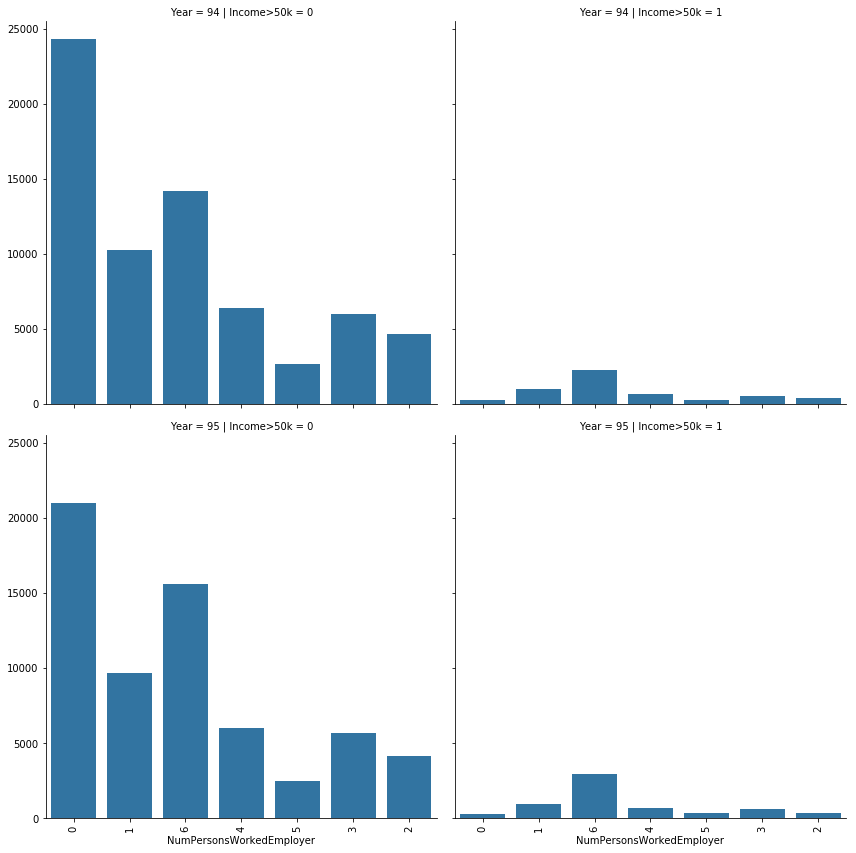

In [560]:
g = sns.FacetGrid(data=df, col='Income>50k', row='Year', height=6)
g.map(sns.countplot, 'NumPersonsWorkedEmployer', order=df['NumPersonsWorkedEmployer'].unique() )
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=90) # set new labels

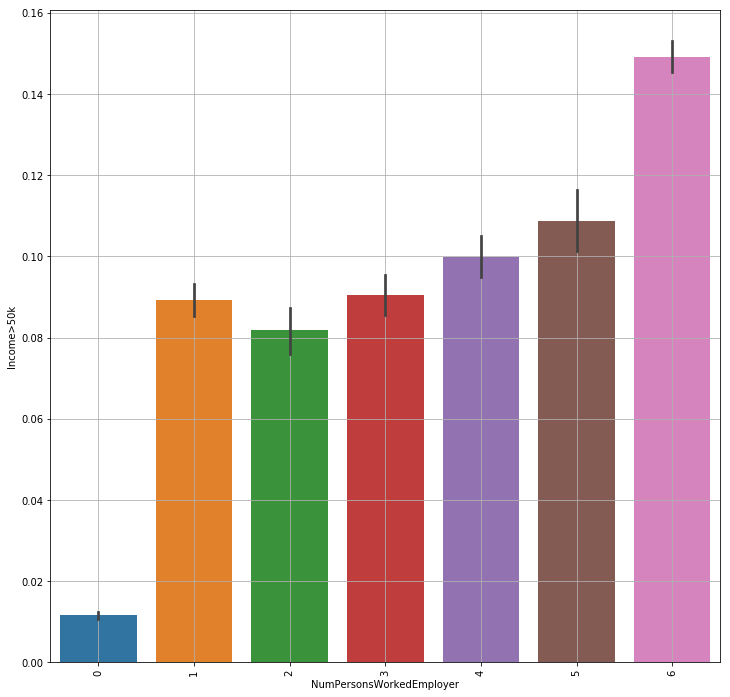

In [561]:
plt.figure(figsize=(12,12))
sns.barplot(x='NumPersonsWorkedEmployer', y='Income>50k', data=df, dodge=True)
plt.xticks(rotation=90)
plt.grid(True)

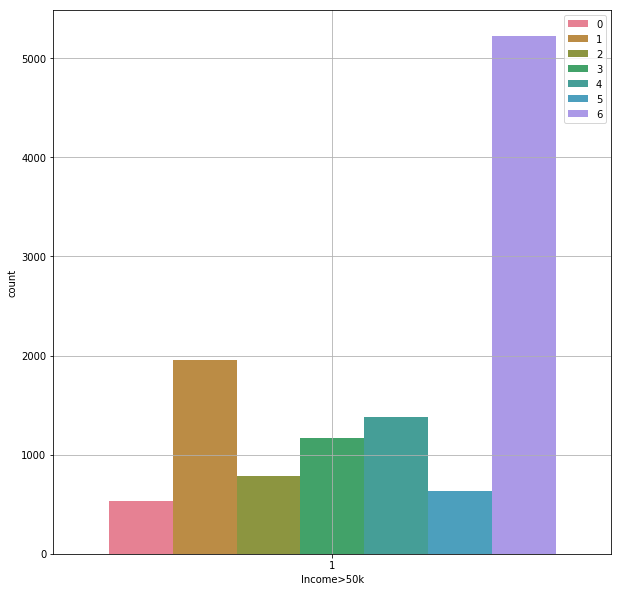

In [562]:
plt.figure(figsize=(10,10))
sns.countplot(x='Income>50k', hue='NumPersonsWorkedEmployer', data=df[df['Income>50k']==1],palette=sns.color_palette("husl", 8))
plt.grid()
plt.legend(fontsize='medium')

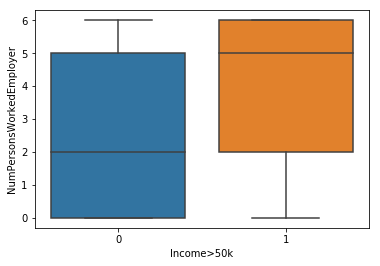

In [563]:
sns.boxplot(x='Income>50k', y="NumPersonsWorkedEmployer", data=df)

<b>CountryBirthFather

In [564]:
df['CountryBirthFather'].describe()

count            145005
unique               42
top       United-States
freq             114596
Name: CountryBirthFather, dtype: object

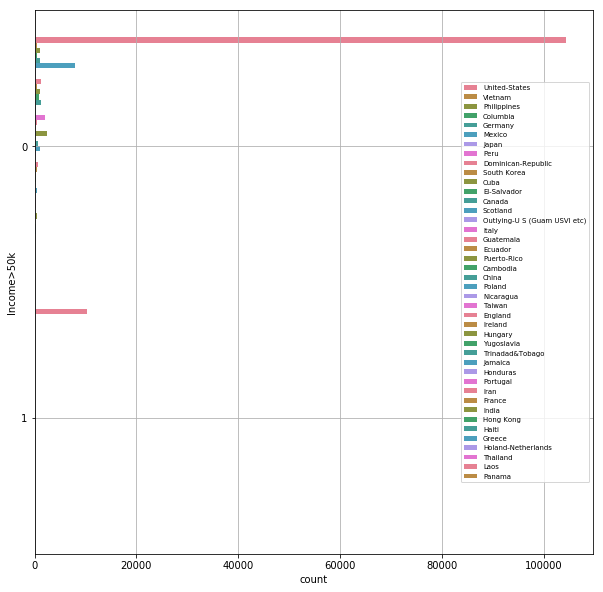

In [565]:
plt.figure(figsize=(10,10))
sns.countplot(y='Income>50k', hue='CountryBirthFather', data=df, orient='H',palette=sns.color_palette("husl", 8))
plt.grid()
plt.legend(fontsize='x-small')

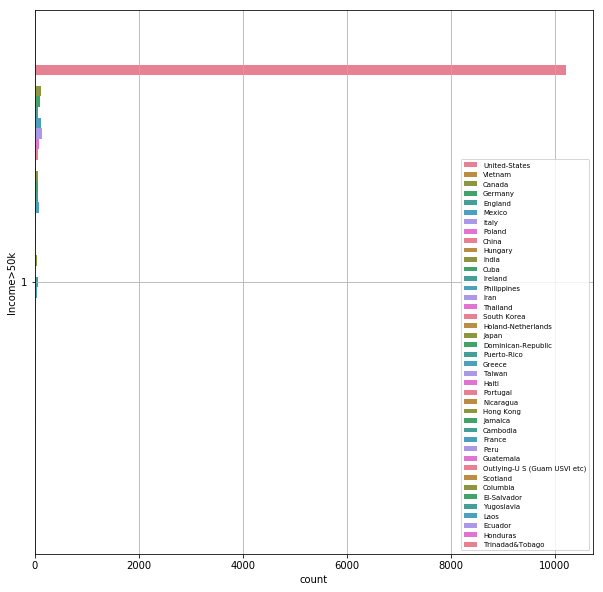

In [566]:
plt.figure(figsize=(10,10))
sns.countplot(y='Income>50k', hue='CountryBirthFather', data=df[df['Income>50k']==1], orient='H',palette=sns.color_palette("husl", 8))
plt.grid()
plt.legend(fontsize='x-small')

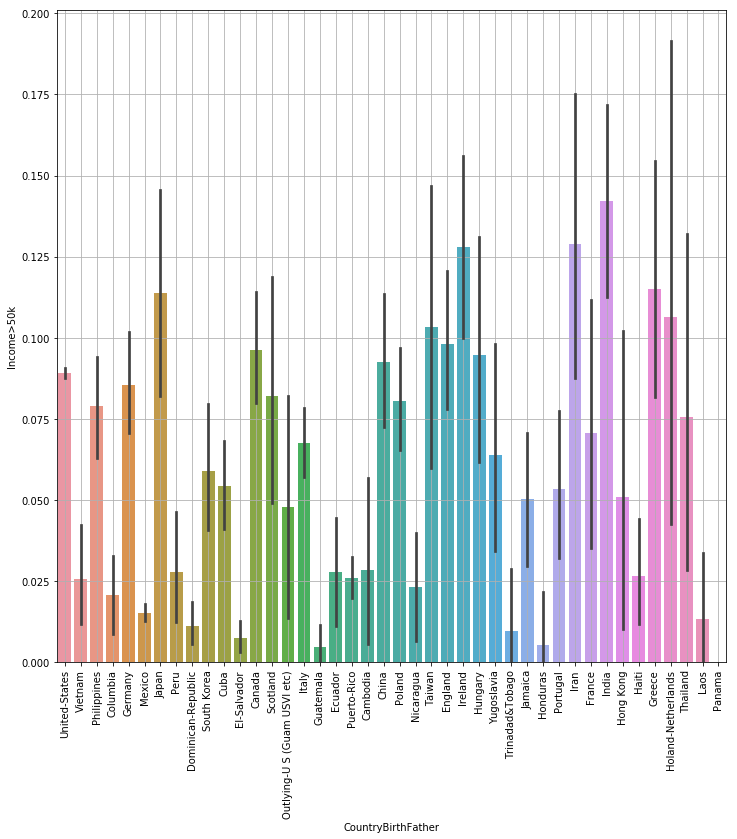

In [567]:
plt.figure(figsize=(12,12))
sns.barplot(x='CountryBirthFather', y='Income>50k', data=df, dodge=True)
plt.xticks(rotation=90)
plt.grid(True)

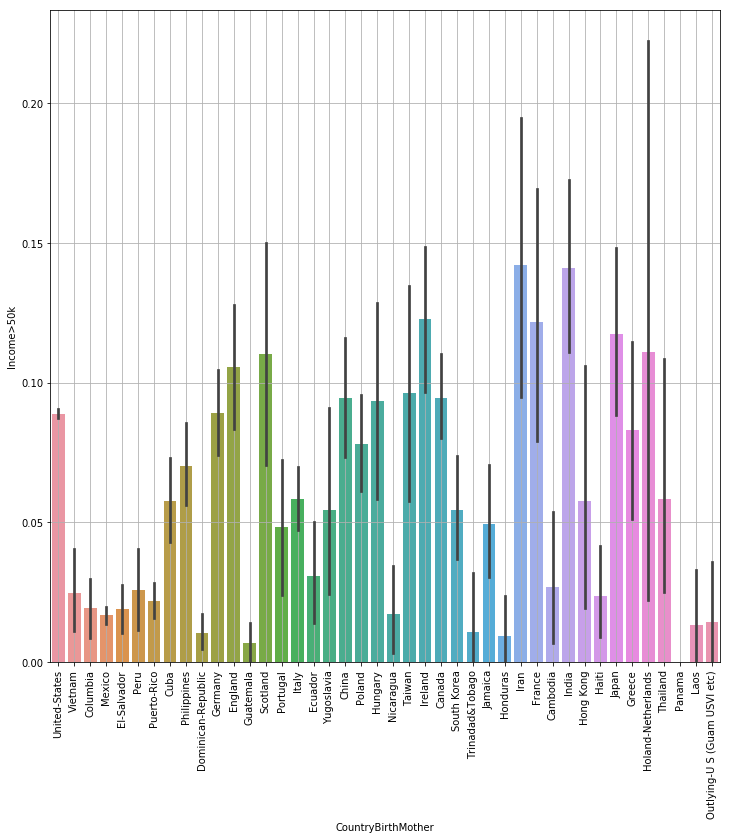

In [568]:
plt.figure(figsize=(12,12))
sns.barplot(x='CountryBirthMother', y='Income>50k', data=df, dodge=True)
plt.xticks(rotation=90)
plt.grid(True)

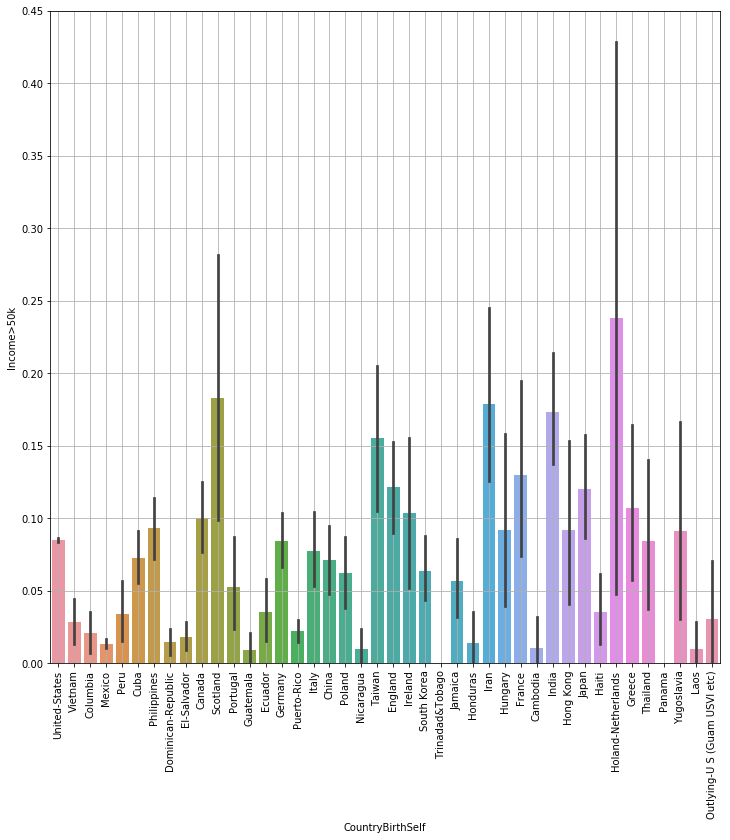

In [569]:
plt.figure(figsize=(12,12))
sns.barplot(x='CountryBirthSelf', y='Income>50k', data=df, dodge=True)
plt.xticks(rotation=90)
plt.grid(True)

In [570]:
#BirthCountry columns don't seem to be relevant. I will drop them for now.
df.drop(['CountryBirthFather','CountryBirthMother','CountryBirthSelf'], axis=1, inplace=True)
df_test.drop(['CountryBirthFather','CountryBirthMother','CountryBirthSelf'], axis=1, inplace=True)

<b>Citizenship

In [571]:
df['Citizenship'].describe()

count                                145005
unique                                    5
top       Native- Born in the United States
freq                                 126782
Name: Citizenship, dtype: object

In [572]:
df['Citizenship'].value_counts()

Native- Born in the United States              126782
Foreign born- Not a citizen of U S              10829
Foreign born- U S citizen by naturalization      4614
Native- Born in Puerto Rico or U S Outlying      1469
Native- Born abroad of American Parent(s)        1311
Name: Citizenship, dtype: int64

In [573]:
df['Citizenship'].value_counts(normalize=True)

Native- Born in the United States              0.874328
Foreign born- Not a citizen of U S             0.074680
Foreign born- U S citizen by naturalization    0.031820
Native- Born in Puerto Rico or U S Outlying    0.010131
Native- Born abroad of American Parent(s)      0.009041
Name: Citizenship, dtype: float64

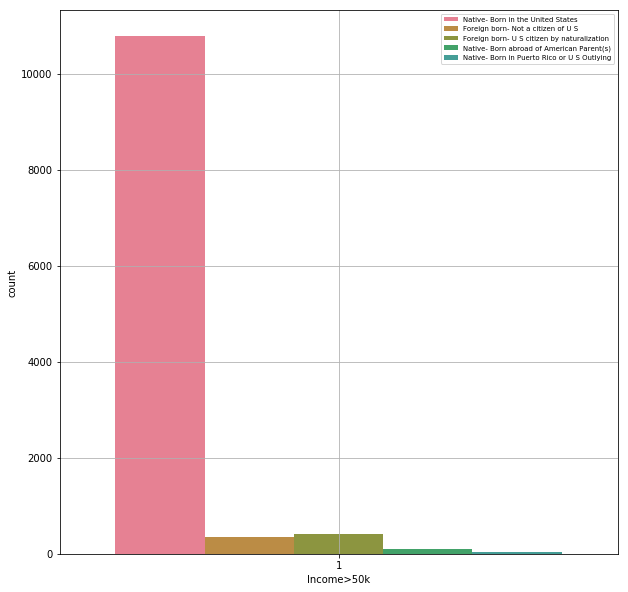

In [574]:
plt.figure(figsize=(10,10))
sns.countplot(x='Income>50k', hue='Citizenship', data=df[df['Income>50k']==1],palette=sns.color_palette("husl", 8))
plt.grid()
plt.legend(fontsize='x-small')

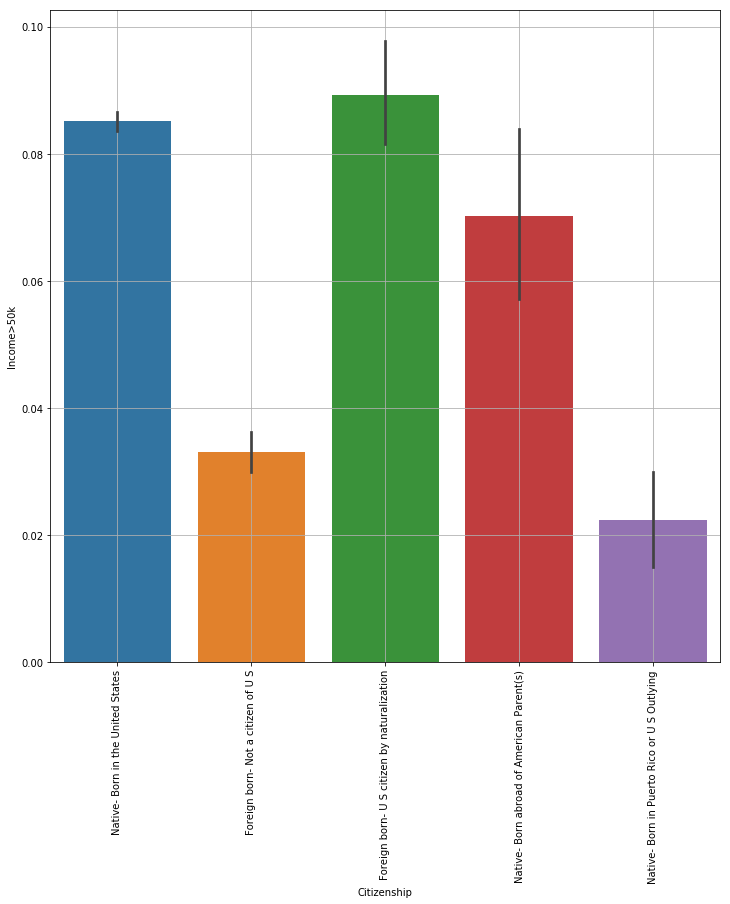

In [575]:
plt.figure(figsize=(12,12))
sns.barplot(x='Citizenship', y='Income>50k', data=df, dodge=True)
plt.xticks(rotation=90)
plt.grid(True)

In [576]:
#I will replace the values with 1 = US Citizen, and 0 = Non-US Citizen   
df['Citizenship'] = df['Citizenship'].apply(lambda x: 0 if x == 'Foreign born- Not a citizen of U S' else 1)
df_test['Citizenship'] = df_test['Citizenship'].apply(lambda x: 0 if x == 'Foreign born- Not a citizen of U S' else 1)

<b>OwnBusiness

In [577]:
df['OwnBusiness'].value_counts()

0    126718
2     15685
1      2602
Name: OwnBusiness, dtype: int64

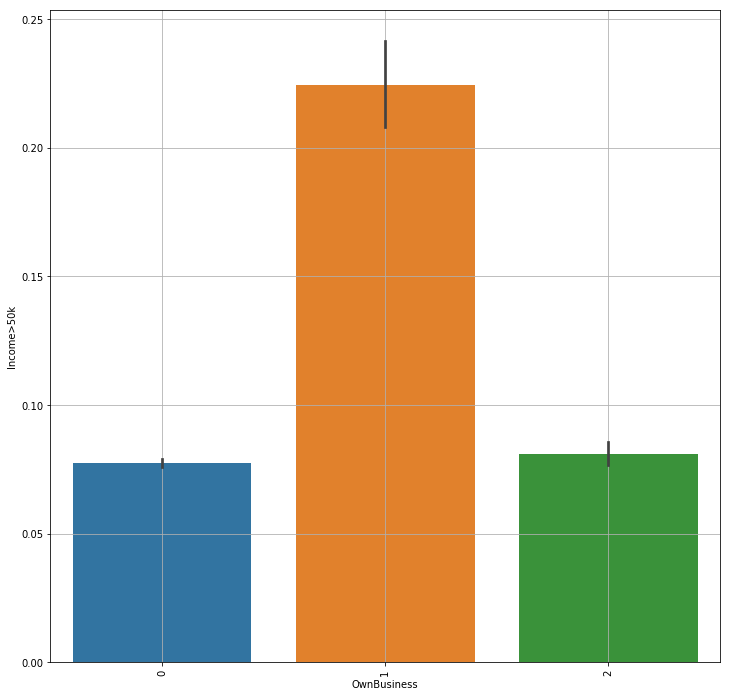

In [578]:
plt.figure(figsize=(12,12))
sns.barplot(x='OwnBusiness', y='Income>50k', data=df, dodge=True)
plt.xticks(rotation=90)
plt.grid(True)

In [579]:
#Very clear correlation between Owning a Business and Income.
#I will rename '2' to 1.
df['OwnBusiness'] = np.where(df['OwnBusiness'] == 0, 0, 1)
df_test['OwnBusiness'] = np.where(df_test['OwnBusiness'] == 0, 0, 1)

df['OwnBusiness'].value_counts(normalize=True)

0    0.873887
1    0.126113
Name: OwnBusiness, dtype: float64

<b>VeteranBenefits'

In [580]:
df['VeteranBenefits'].describe()

count    145005.000000
mean          1.826165
std           0.551837
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: VeteranBenefits, dtype: float64

In [581]:
df['VeteranBenefits'].value_counts()

2    131464
0     11666
1      1875
Name: VeteranBenefits, dtype: int64

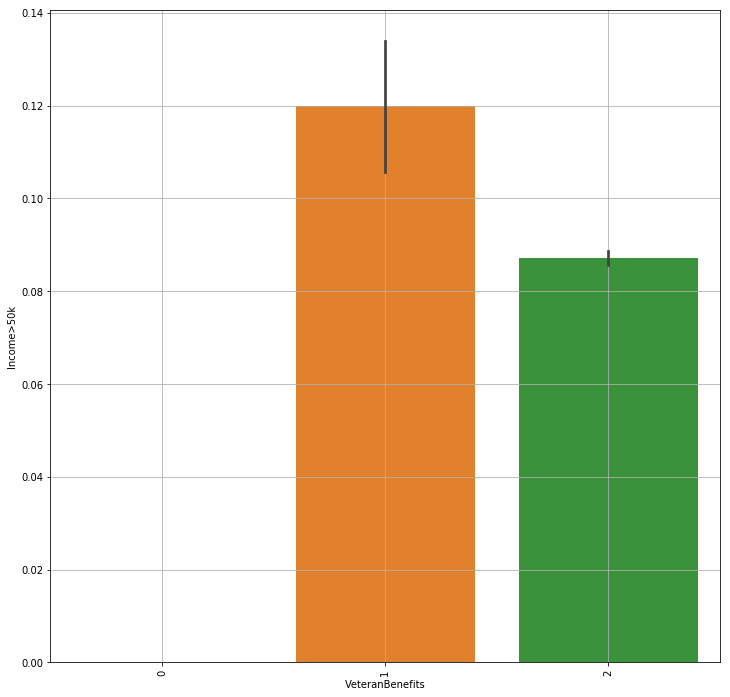

In [582]:
plt.figure(figsize=(12,12))
sns.barplot(x='VeteranBenefits', y='Income>50k', data=df, dodge=True)
plt.xticks(rotation=90)
plt.grid(True)

In [583]:
#Couldn't find any explanations for this column, what it means, what are the digits. hence I will drop it for now
df.drop('VeteranBenefits', axis=1, inplace=True)
df_test.drop('VeteranBenefits', axis=1, inplace=True)

<b>WeeksWorkedInY

In [584]:
df['WeeksWorkedInY'].describe()

count    145005.000000
mean         30.532313
std          23.667317
min           0.000000
25%           0.000000
50%          47.000000
75%          52.000000
max          52.000000
Name: WeeksWorkedInY, dtype: float64

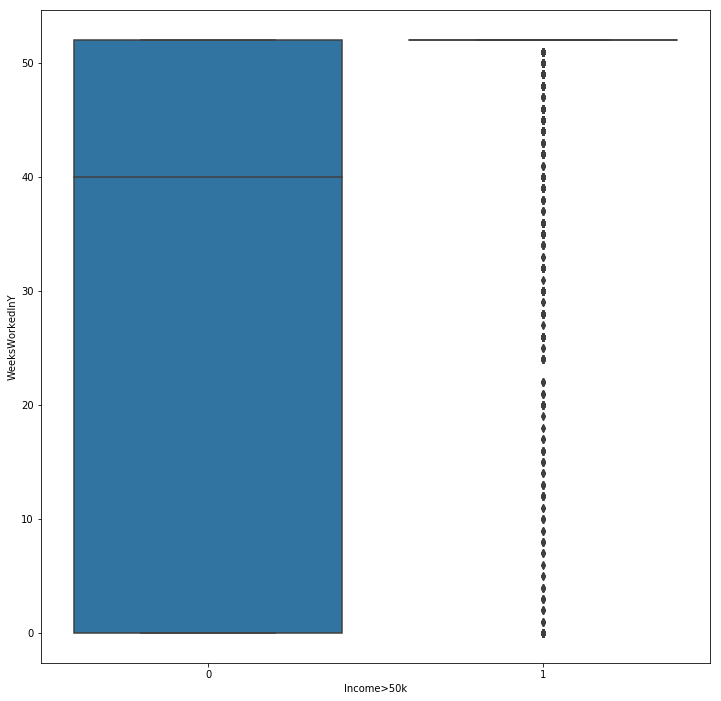

In [585]:
plt.figure(figsize=(12,12))
sns.boxplot(x='Income>50k', y='WeeksWorkedInY', data=df)

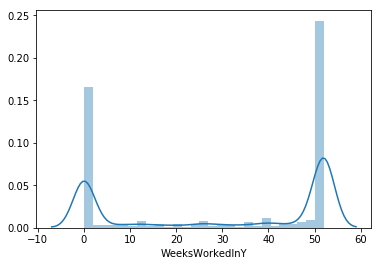

In [586]:
sns.distplot(df['WeeksWorkedInY'])

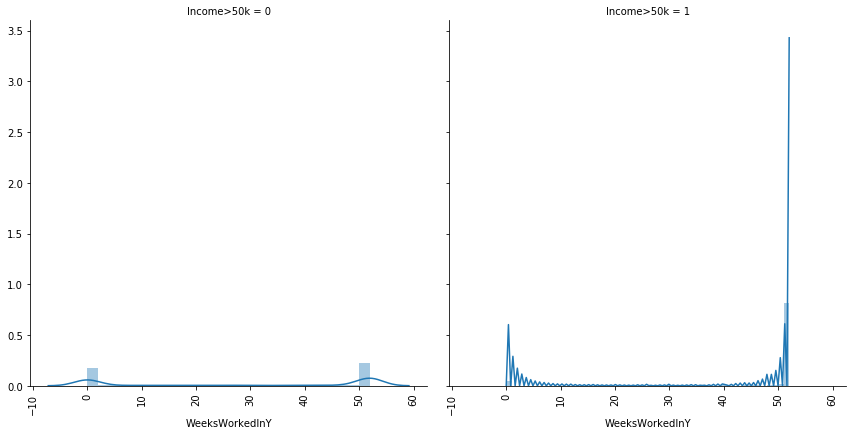

In [587]:
g = sns.FacetGrid(data=df, col='Income>50k', height=6)
g.map(sns.distplot, 'WeeksWorkedInY' )
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=90) # set new labels

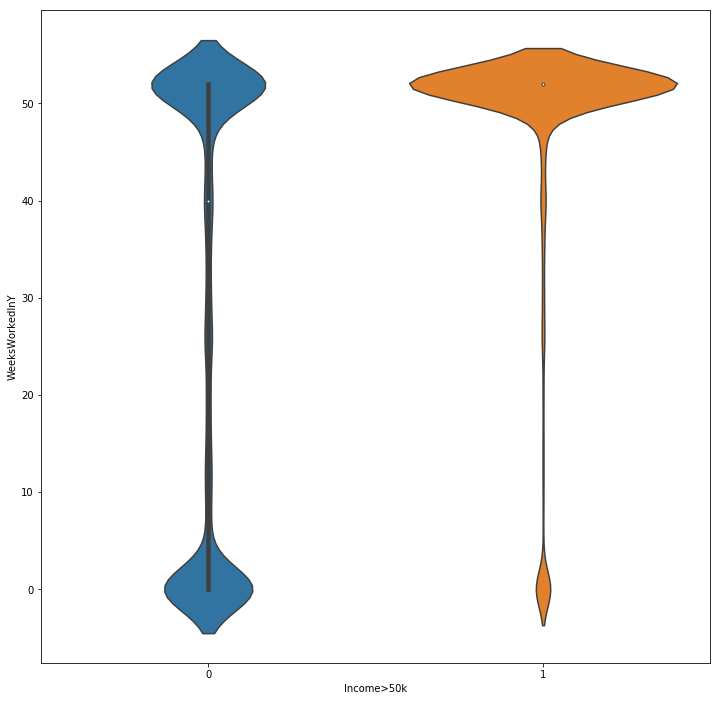

In [588]:
plt.figure(figsize=(12,12))
sns.violinplot(x='Income>50k', y='WeeksWorkedInY', data=df)

<b>Year

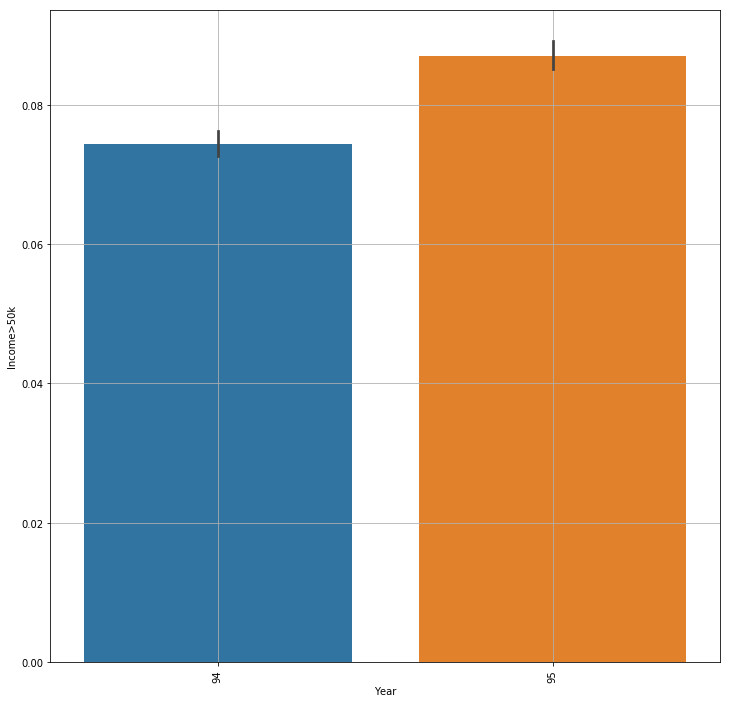

In [589]:
plt.figure(figsize=(12,12))
sns.barplot(x='Year', y='Income>50k', data=df, dodge=True)
plt.xticks(rotation=90)
plt.grid(True)

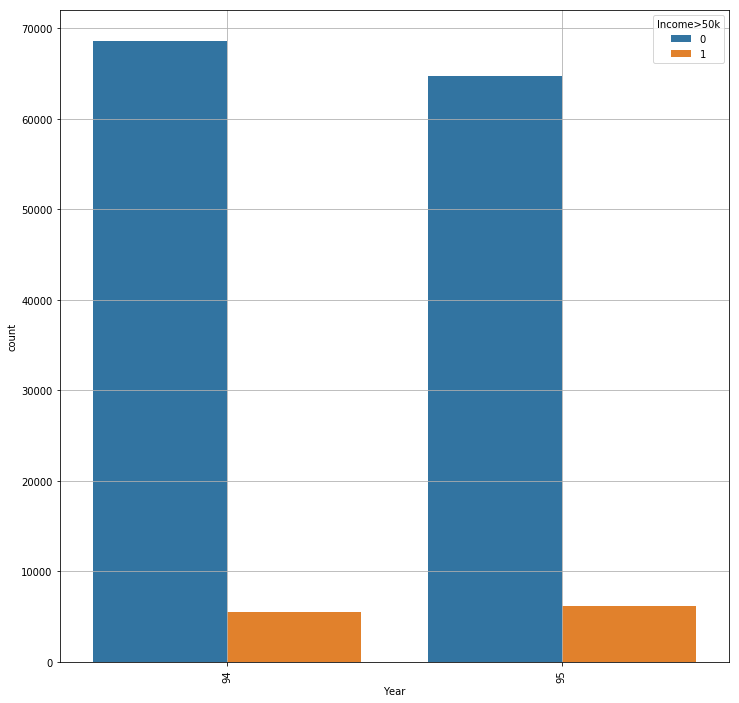

In [590]:
plt.figure(figsize=(12,12))
sns.countplot(x='Year', data=df, hue='Income>50k',dodge=True)
plt.xticks(rotation=90)
plt.grid(True)

In [591]:
#Year doesn't seem to be correlated with Income levels. Even the above charts were very similar for both years
df.drop('Year', axis=1, inplace=True)
df_test.drop('Year', axis=1, inplace=True)

In [592]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145005 entries, 0 to 199520
Data columns (total 20 columns):
Age                         145005 non-null int64
ClassOfWorker               145005 non-null object
Education                   145005 non-null object
WagePerHour                 145005 non-null int64
MaritalStatus               145005 non-null object
MajorIndustryCode           145005 non-null object
MajorOccupationCode         145005 non-null object
Race                        145005 non-null object
Male                        145005 non-null int32
CapitalGains                145005 non-null int64
CapitalLosses               145005 non-null int64
StockDividends              145005 non-null int64
TaxFilerStat                145005 non-null object
HouseholdFamilyStatus       145005 non-null object
HouseholdSummary            145005 non-null object
NumPersonsWorkedEmployer    145005 non-null int64
Citizenship                 145005 non-null int64
OwnBusiness                 14

In [593]:
df.describe()

,Age,WagePerHour,Male,CapitalGains,CapitalLosses,StockDividends,NumPersonsWorkedEmployer,Citizenship,OwnBusiness,WeeksWorkedInY,Income>50k
count,145005.000000,145005.000000,145005.000000,145005.000000,145005.000000,145005.000000,145005.000000,145005.000000,145005.000000,145005.000000,145005.000000
mean,39.418468,70.766222,0.485866,557.842136,48.684659,252.061688,2.581587,0.925320,0.126113,30.532313,0.080577
std,19.327772,277.214096,0.499802,5286.552736,308.852831,2260.621084,2.402695,0.262876,0.331978,23.667317,0.272185
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,47.000000,0.000000
75%,52.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,52.000000,0.000000
max,90.000000,2000.000000,1.000000,99999.000000,4608.000000,99999.000000,6.000000,1.000000,1.000000,52.000000,1.000000


In [594]:
df.head()

,Age,ClassOfWorker,Education,WagePerHour,MaritalStatus,MajorIndustryCode,MajorOccupationCode,Race,Male,CapitalGains,CapitalLosses,StockDividends,TaxFilerStat,HouseholdFamilyStatus,HouseholdSummary,NumPersonsWorkedEmployer,Citizenship,OwnBusiness,WeeksWorkedInY,Income>50k
0,73,NA,High school graduate,0,Widowed,Not in universe or children,NA,White,0,0,0,0,Nonfiler,Other,Other relative of householder,0,1,0,0,0
1,58,Self-employed-not incorporated,High school graduate,0,Divorced,Construction,Precision production craft & repair,White,1,0,0,0,Other,Householder,Householder,1,1,0,52,0
2,18,NA,Other,0,Never married,Not in universe or children,NA,Asian or Pacific Islander,0,0,0,0,Nonfiler,Other,Child 18 or older,0,0,0,0,0
3,9,NA,Other,0,Never married,Not in universe or children,NA,White,0,0,0,0,Nonfiler,Other,Child under 18 never married,0,1,0,0,0
4,10,NA,Other,0,Never married,Not in universe or children,NA,White,0,0,0,0,Nonfiler,Other,Child under 18 never married,0,1,0,0,0


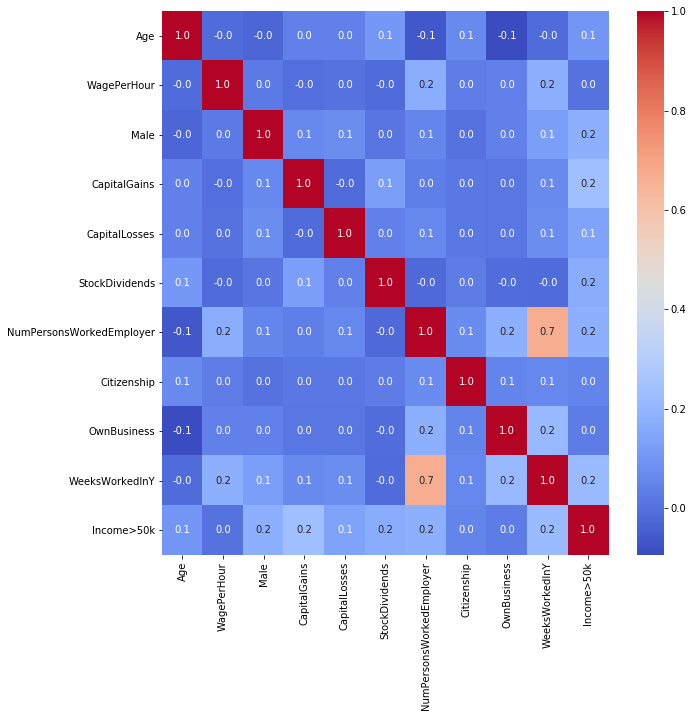

In [595]:
plt.subplots(figsize=(10, 10))
df_cor = df.corr()
sns.heatmap(df_cor, annot=True, fmt = ".1f", cmap = "coolwarm")

In [596]:
df_test.shape

(74777, 20)

In [597]:
df.shape

(145005, 20)

# MODELING

## Encoding


In [598]:
df_train_encoded=pd.get_dummies(df, columns=['ClassOfWorker', 'Education', 'MaritalStatus', 'MajorIndustryCode', 
                                       'MajorOccupationCode', 'Race', 'TaxFilerStat', 'HouseholdFamilyStatus',
                                      'HouseholdSummary'],
                         prefix=['ClassOfWorker', 'Education', 'MaritalStatus', 'MajorIndustryCode', 
                                       'MajorOccupationCode', 'Race', 'TaxFilerStat', 'HouseholdFamilyStatus',
                                      'HouseholdSummary'])

df_test_encoded=pd.get_dummies(df_test, columns=['ClassOfWorker', 'Education', 'MaritalStatus', 'MajorIndustryCode', 
                                       'MajorOccupationCode', 'Race', 'TaxFilerStat', 'HouseholdFamilyStatus',
                                      'HouseholdSummary'],
                         prefix=['ClassOfWorker', 'Education', 'MaritalStatus', 'MajorIndustryCode', 
                                       'MajorOccupationCode', 'Race', 'TaxFilerStat', 'HouseholdFamilyStatus',
                                      'HouseholdSummary'])

In [599]:
df_train_encoded.shape

(145005, 86)

In [600]:
X_train = df_train_encoded.loc[:,df_train_encoded.columns != 'Income>50k']
y_train = df_train_encoded['Income>50k']
X_test = df_test_encoded.loc[:,df_test_encoded.columns != 'Income>50k']
y_test = df_test_encoded['Income>50k']

## Use RandomForest for Feature Selection

In [601]:
#First, scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),  columns=X_test.columns)

C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  """
C:\Users\ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  


In [602]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [603]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(rfc, prefit=True)
selected_feat= X_train.columns[(sel.get_support())]


In [604]:
print('Selected Features:\n',*selected_feat, sep='\n')

Selected Features:

Age
WagePerHour
Male
CapitalGains
CapitalLosses
StockDividends
NumPersonsWorkedEmployer
OwnBusiness
WeeksWorkedInY
Education_Bachelors degree(BA AB BS)
Education_High school graduate
Education_Masters degree(MA MS MEng MEd MSW MBA)
Education_Other
Education_Prof school degree (MD DDS DVM LLB JD)
MajorOccupationCode_Executive admin and managerial
MajorOccupationCode_Professional specialty


In [605]:
X_train = X_train[selected_feat]
X_test = X_test[selected_feat]

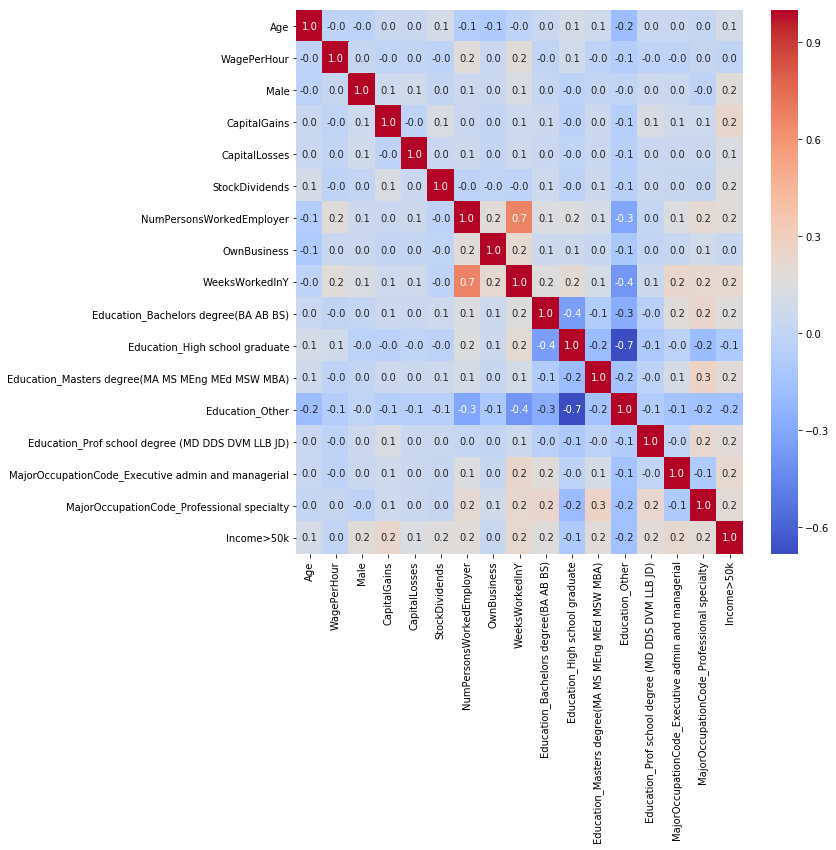

In [606]:
df2 = pd.concat([X_train,y_train.reset_index()], axis=1)
df2.drop('index', axis = 1 ,inplace=True)

plt.subplots(figsize=(10, 10))
df_cor = df2.corr()
sns.heatmap(df_cor, annot=True, fmt = ".1f", cmap = "coolwarm")

## Model Selection

In [607]:
X_train.shape

(145005, 16)

In [608]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [609]:
kfold = StratifiedKFold(n_splits=10)

In [610]:
#Doing 10-fold cross validation, using Decision Tree and Logistic Regression

rs=42

classifiers = [] # list of classifiers tested
classifiers.append(LogisticRegression(random_state = rs))
classifiers.append(DecisionTreeClassifier(random_state = rs))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y_train, scoring = 'roc_auc', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({'CV_score':cv_means, 'CV_stddev':cv_std, 'Algorithm':['LogisticRegression','DecisionTree']})

In [611]:
cv_res

,CV_score,CV_stddev,Algorithm
0,0.908088,0.006893,LogisticRegression
1,0.729347,0.005867,DecisionTree


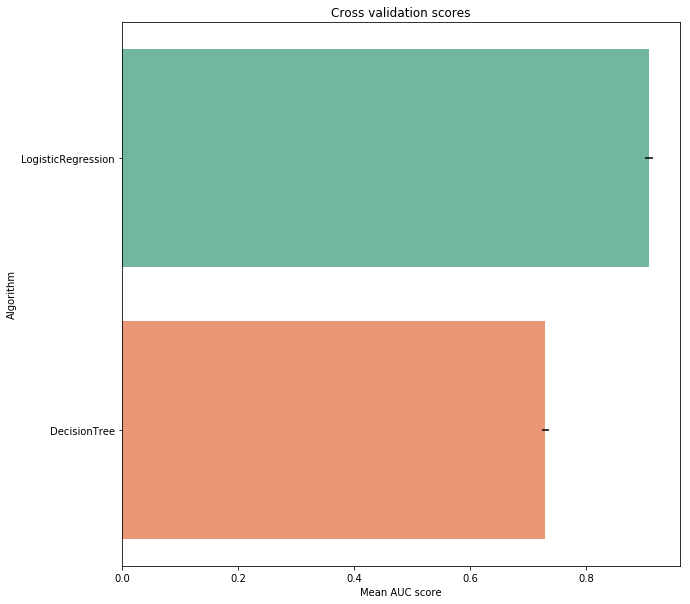

In [612]:
plt.subplots(figsize=(10, 10))
g = sns.barplot('CV_score','Algorithm', data = cv_res, palette='Set2', orient = 'h',**{'xerr':cv_std})
g.set_xlabel('Mean AUC score')
g = g.set_title('Cross validation scores')

## Logistic Regression

In [613]:
from sklearn.metrics import roc_curve, auc

LR = LogisticRegression(random_state=42)
y_score = LR.fit(X_train, y_train).decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr[0], tpr[0], _ = roc_curve(y_test, y_score)
roc_auc[0] = auc(fpr[0], tpr[0])

# Compute micro-average ROC curve and ROC area
fpr[1], tpr[1], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc[1] = auc(fpr[1], tpr[1])

C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


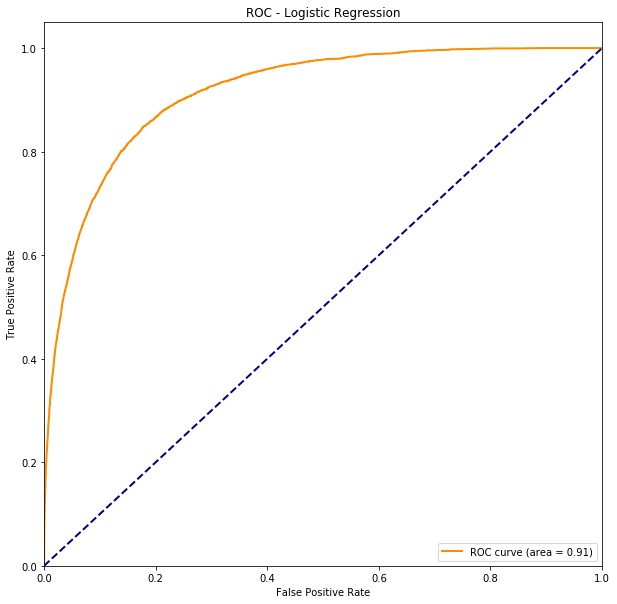

In [614]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [615]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [616]:
# use trained model to make predictions on test set
y_pred = LR.predict(X_test)

Confusion matrix, without normalization
[[68137   813]
 [ 3901  1926]]
Normalized confusion matrix
[[ 0.99  0.01]
 [ 0.67  0.33]]


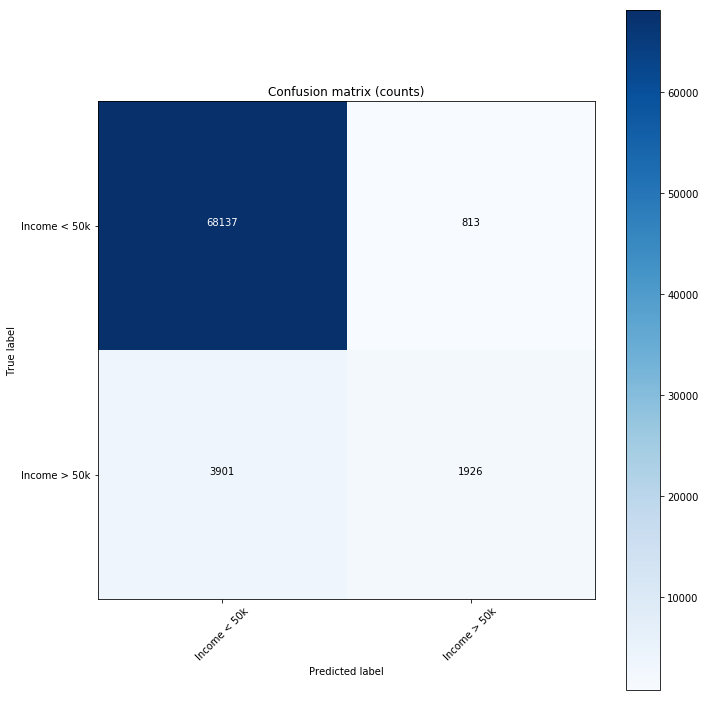

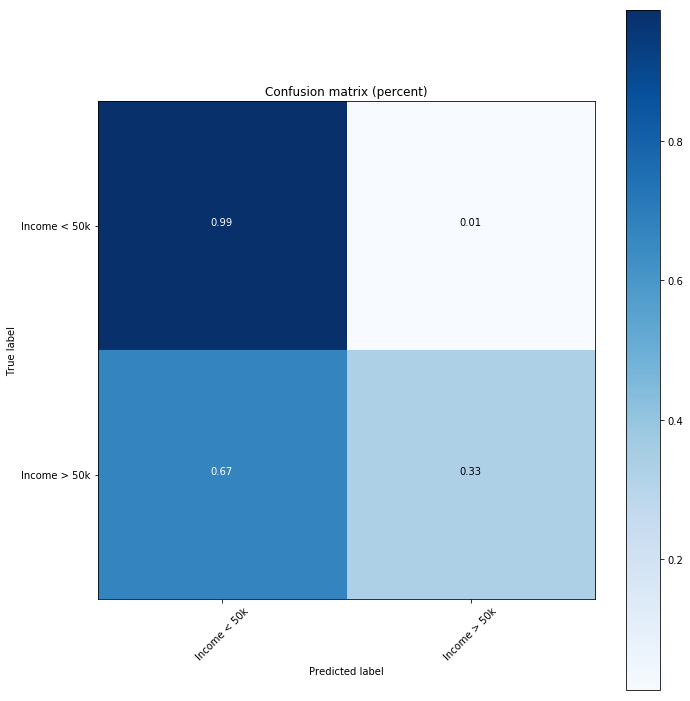

In [617]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

class_names = ['Income < 50k', 'Income > 50k']

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix (counts)')

# Plot normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Confusion matrix (percent)')

In [618]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy: " , "%.2f" % (accuracy_score(y_test, y_pred)*100),'%')
print("Precision: " , "%.2f" % (precision_score(y_test, y_pred)*100),'%')
print("Recall: " , "%.2f" % (recall_score(y_test, y_pred)*100),'%')

Accuracy:  93.70 %
Precision:  70.32 %
Recall:  33.05 %


<b>Accuracy is 93.70%, i.e. better than simply predicting that everybody make <50k.   
Precision 70.32% means that 70.32 of the one predicted >50k are actually >50k   
Recall 33% means that out of the ones who actually make >50k, the model could only find 33% of them.   
Given the skewness of the data, I will to use Oversampling, hoping to get better results.   

## Oversampling

Due to the unbalanced data I use SMOTE to oversample the training data.

In [619]:
from imblearn.over_sampling import SMOTE

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (145005, 16)
Number transactions y_train dataset:  (145005,)
Number transactions X_test dataset:  (74777, 16)
Number transactions y_test dataset:  (74777,)


In [620]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 11684
Before OverSampling, counts of label '0': 133321 

After OverSampling, the shape of train_X: (266642, 16)
After OverSampling, the shape of train_y: (266642,) 

After OverSampling, counts of label '1': 133321
After OverSampling, counts of label '0': 133321


In [621]:
X_train_res = pd.DataFrame(X_train_res, columns = X_train.columns)

In [622]:
#Using Random Forest for feature selection
rfc.fit(X_train_res, y_train_res)
sel = SelectFromModel(rfc, prefit=True)
selected_feat= X_train_res.columns[(sel.get_support())]
print('Selected Features:\n',*selected_feat, sep='\n')
X_train_res = X_train_res[selected_feat]
X_test = X_test[selected_feat]

Selected Features:

Age
Male
StockDividends
NumPersonsWorkedEmployer
WeeksWorkedInY


In [623]:
#Doing 10-fold cross validation, using Decision Tree and Logistic Regression

rs=42

classifiers = [] # list of classifiers tested
classifiers.append(LogisticRegression(random_state = rs))
classifiers.append(DecisionTreeClassifier(random_state = rs))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train_res, y_train_res, scoring = 'roc_auc', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({'CV_score':cv_means, 'CV_stddev':cv_std, 'Algorithm':['LogisticRegression','DecisionTree']})

In [624]:
cv_res

,CV_score,CV_stddev,Algorithm
0,0.854965,0.006464,LogisticRegression
1,0.936062,0.060799,DecisionTree


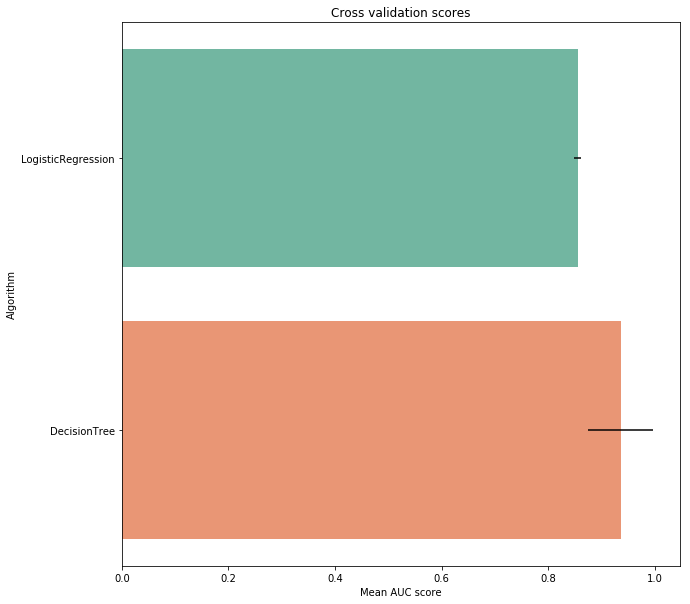

In [625]:
plt.subplots(figsize=(10, 10))
g = sns.barplot('CV_score','Algorithm', data = cv_res, palette='Set2', orient = 'h',**{'xerr':cv_std})
g.set_xlabel('Mean AUC score')
g = g.set_title('Cross validation scores')

In [626]:
# define LogisticRegression
LR = DecisionTreeClassifier(random_state=42)

# fit LR model to (oversampled) training data
LR.fit(X_train_res, y_train_res)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [627]:
# use trained model to make predictions on test set
y_pred = LR.predict(X_test)

Confusion matrix, without normalization
[[64303  4647]
 [ 3499  2328]]
Normalized confusion matrix
[[ 0.93  0.07]
 [ 0.6   0.4 ]]


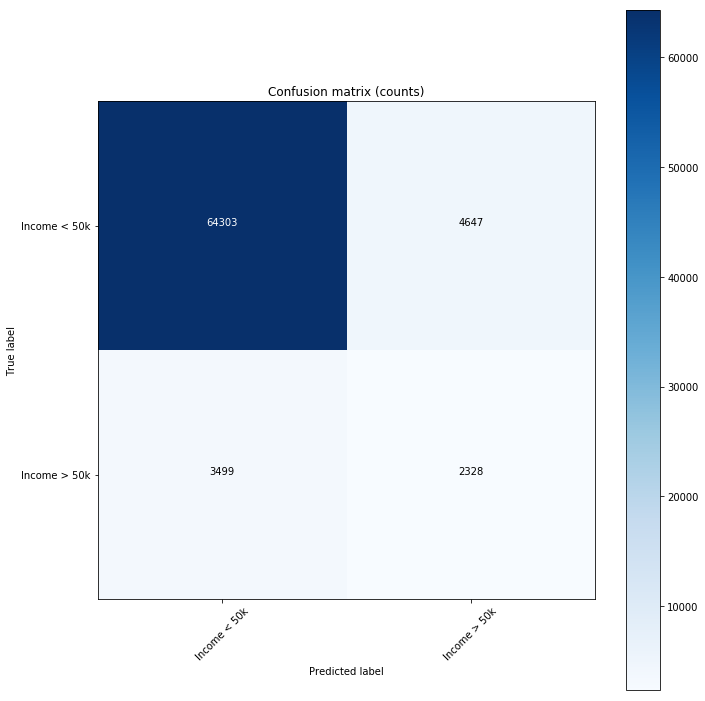

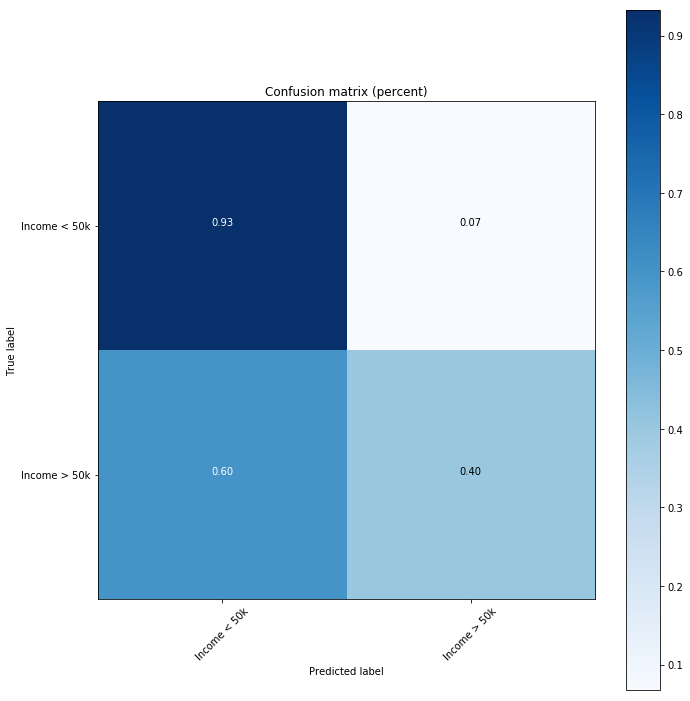

In [628]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

class_names = ['Income < 50k', 'Income > 50k']

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix (counts)')

# Plot normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Confusion matrix (percent)')

In [629]:
print("Accuracy: " , "%.2f" % (accuracy_score(y_test, y_pred)*100),'%')
print("Precision: " , "%.2f" % (precision_score(y_test, y_pred)*100),'%')
print("Recall: " , "%.2f" % (recall_score(y_test, y_pred)*100),'%')

Accuracy:  89.11 %
Precision:  33.38 %
Recall:  39.95 %


<b>Recall rate got much better after oversampling, but accuracy and precisoin went down.

## Conclusion

Based on the above two scenarios (with and without oversampling), the user can select the one that matches his requirements. Since Recall and precision varied significantly, then it will depend on what is more important:  
1- Making correct predictions => No oversampling  
2- Finding as many >50k as possible => Oversampling  
3- Correctly predicting >50k => No Oversampling  